In [8]:
from neural_priors.utils.data import Subject, get_all_behavioral_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op

from neural_priors.utils.data import Subject
from tqdm.contrib.itertools import product


In [9]:
behavior = get_all_behavioral_data()

In [10]:
bids_folder = '/data/ds-neuralpriors'

load_data_via_tsv = True

In [11]:


if load_data_via_tsv:
    df = pd.read_csv(op.join(bids_folder, 'derivatives', 'encoding_model', 'npcr_parameters.tsv'), sep='\t',
                    index_col=[0, 1, 2, 3, 4, 5],
                    dtype={'subject':str})

    df.index.set_names('voxel', level=-1, inplace=True)
else:
    df = []
    keys = []
    subjects = [f'{subject:02d}' for subject in range(1, 25)]
    subjects.pop(subjects.index('11'))
    subjects.pop(subjects.index('16'))
    subjects.pop(subjects.index('23'))

    for subject, range_n, session, smoothed in product(subjects, ['wide', 'narrow', None, 'wide2'], [None], [True, False]):
    # for subject, range_n, session, smoothed in product(subjects, ['wide', 'narrow', None], [None], [True, False]):
        sub = Subject(subject, bids_folder)
        df.append(sub.get_prf_parameters_volume(session=session, cross_validated=False, roi='NPCr', smoothed=smoothed, range_n=range_n))
        keys.append((subject,
                    range_n if range_n is not None else 'both', session if session is not None else 'both',
                    'smoothed' if smoothed else 'unsmoothed'))

    df = pd.concat(df, keys=keys, names=['subject', 'range_n', 'session', 'smoothed'])
    df.to_csv(op.join(bids_folder, 'derivatives', 'encoding_model', 'npcr_parameters.tsv'), sep='\t')

df = df.unstack('range_n')

In [12]:
for c in df['mode'].columns:

    mode = df[('mode', c)]
    fwhm = df[('width', c)]

    df[('log_sigma', c)] = 1./(np.sqrt(2.*np.log(2.))) * np.arcsinh(fwhm/(mode*2.))
    df[('log(mode)', c)] = np.log(mode)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
df.groupby(['subject', 'smoothed', 'model'])['cvr2'].apply(lambda x: (x>0.0).mean()).sort_values('narrow')

range_n                      narrow      wide
subject smoothed model                       
21      smoothed gaussian  0.016291  0.055138
36      smoothed gaussian  0.017123  0.065068
03      smoothed gaussian  0.019608  0.058824
18      smoothed gaussian  0.021448  0.100536
40      smoothed gaussian  0.030100  0.039019
25      smoothed gaussian  0.031447  0.060377
37      smoothed gaussian  0.037594  0.078947
27      smoothed gaussian  0.039024  0.217073
05      smoothed gaussian  0.047267  0.053176
32      smoothed gaussian  0.049865  0.036388
14      smoothed gaussian  0.053750  0.167500
34      smoothed gaussian  0.064087  0.119710
01      smoothed gaussian  0.075227  0.027237
15      smoothed gaussian  0.077530  0.346912
35      smoothed gaussian  0.079091  0.045455
24      smoothed gaussian  0.090543  0.140845
29      smoothed gaussian  0.091754  0.042973
28      smoothed gaussian  0.105125  0.107753
02      smoothed gaussian  0.108140  0.072093
10      smoothed gaussian  0.121131  0.048452
06      smoothed gaussian  0.145342  0.113043
33      smoothed gaussian  0.148962  0.030525
20      smoothed gaussian  0.160555  0.180377
17      smoothed gaussian  0.161538  0.121795
04      smoothed gaussian  0.169032  0.154839
08      smoothed gaussian  0.235849  0.125786
19      smoothed gaussian  0.238202  0.274157
31      smoothed gaussian  0.240947  0.023677
16      smoothed gaussian  0.280702  0.201754
39      smoothed gaussian  0.283166  0.493868
09      smoothed gaussian  0.296703  0.169545
26      smoothed gaussian  0.325581  0.186047
30      smoothed gaussian  0.345912  0.244235
22      smoothed gaussian  0.358279  0.150608
41      smoothed gaussian  0.371758  0.497118
07      smoothed gaussian  0.378924  0.243274
13      smoothed gaussian  0.390845  0.372066
12      smoothed gaussian  0.498876  0.286517
38      smoothed gaussian  0.653846  0.257835

In [6]:
tmp = df.xs('gaussian', 0, 'model')

In [7]:
sns.histplot(tmp[tmp['cvr2', 'both'] > 0.0][('baseline', 'both')], bins=np.arange(-2, 2, 0.1))
sns.histplot(tmp[tmp['cvr2', 'both'] > 0.0][('amplitude', 'both')], bins=np.arange(-2, 2, 0.1))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'both'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "index.pyx", line 842, in pandas._libs.index.BaseMultiIndexCodesEngine.get_loc
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3798, in get_loc
    raise KeyError(key) from err
KeyError: 'both'

During handling of the above exception, another exception occ

In [ ]:
tmp

<Axes: xlabel="('amplitude', 'both')", ylabel='Count'>

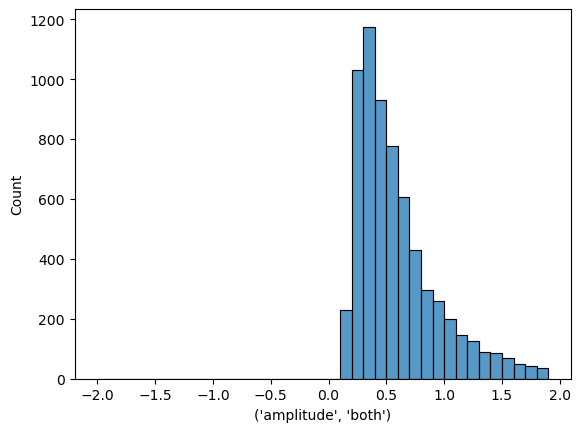

In [18]:
sns.histplot(tmp[tmp['cvr2', 'both'] > 0.0][('baseline', 'both')], bins=np.arange(-2, 2, 0.1))
sns.histplot(tmp[tmp['cvr2', 'both'] > 0.0][('amplitude', 'both')], bins=np.arange(-2, 2, 0.1))
# sns.distplot(tmp[tmp['cvr2', 'both'] > 0.0][('amplitude', 'both')])

In [7]:
df.stack('range_n').groupby(['smoothed', 'range_n', 'model']).apply(lambda d: (d['cvr2'] > 0.0).mean()).unstack('model')

model               gaussian  lognormal
smoothed   range_n                     
smoothed   both     0.163867   0.168076
           narrow   0.173528   0.173784
           wide     0.137520   0.140411
           wide2    0.037509   0.038460
unsmoothed both     0.087569   0.089728
           narrow   0.106269   0.107147
           wide     0.091631   0.094119
           wide2    0.030702   0.031361

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_49234/605745153.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='range_n', y='gaussian_better', data=diff.reset_index().melt(id_vars='subject', value_name='gaussian_better'), kind='swarm', palette=['k'])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_49234/605745153.py:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x='range_n', y='gaussian_better', data=diff.reset_index().melt(id_vars='subject', value_name='gaussian_better'), kind='swarm', palette=['k'])


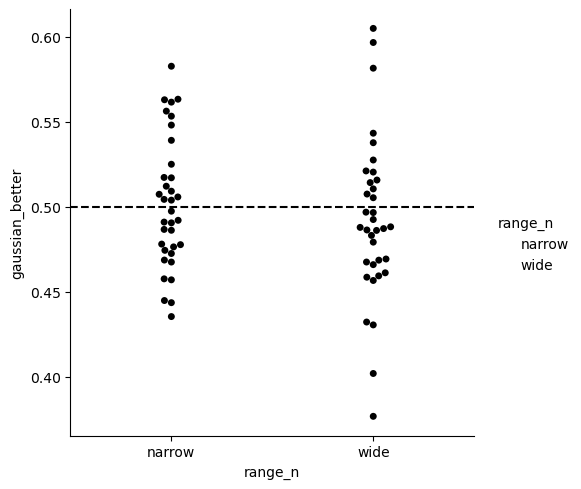

In [8]:
tmp = df['cvr2'].unstack('model')
tmp = tmp.drop(['wide2', 'both'], level=0, axis=1)

# print((tmp.xs('lognormal', level='model', axis=1) > 0.0).mean())
# print((tmp.xs('gaussian', level='model', axis=1) > 0.0).mean())


# print((tmp.xs('gaussian', level='model', axis=1) > 0.0).mean())


sig_themselfs = (tmp > 0.0).groupby(['subject']).mean()

# gauss_better_than_lognormal = (sig_themselfs.xs('gaussian', 1, level=1) > sig_themselfs).mean()

diff = (tmp.xs('gaussian', 1, 1) > tmp.xs('lognormal', 1, 1)).groupby(['subject']).mean()


sns.catplot(x='range_n', y='gaussian_better', data=diff.reset_index().melt(id_vars='subject', value_name='gaussian_better'), kind='swarm', palette=['k'])

plt.axhline(0.5, c='k', ls='--')


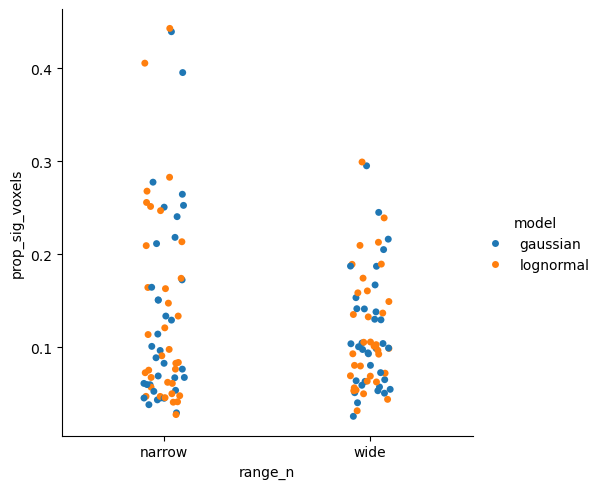

In [9]:
sns.catplot(x='range_n', y='prop_sig_voxels', hue='model', data=sig_themselfs.stack([0, 1]).to_frame('prop_sig_voxels').reset_index())

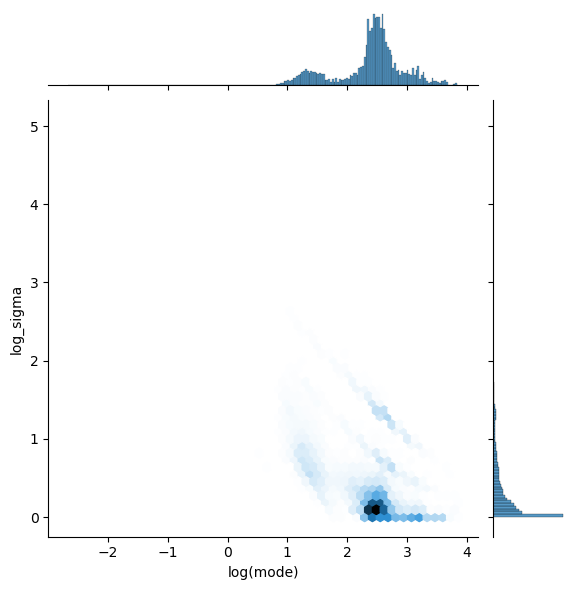

In [10]:
tmp = df.stack('range_n')
tmp = tmp[tmp.cvr2 > 0.01]
sns.jointplot(x='log(mode)', y='log_sigma', data=tmp.reset_index(), kind='hex')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_49234/1370548346.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp.xs('lognormal', 0, 'model').xs('unsmoothed', 0, 'smoothed')['log_sigma'])


<Axes: xlabel='log_sigma', ylabel='Density'>

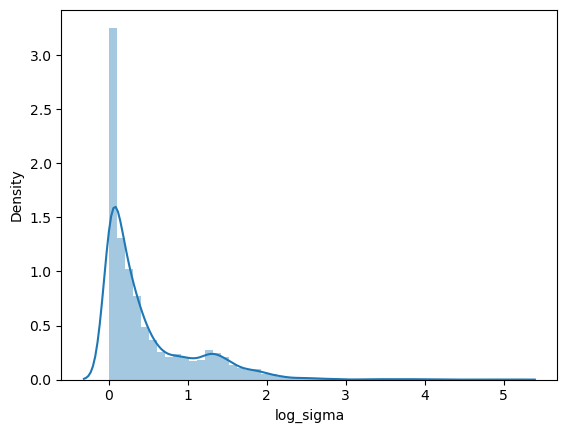

In [19]:
sns.distplot(tmp.xs('lognormal', 0, 'model').xs('unsmoothed', 0, 'smoothed')['log_sigma'])

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_49234/3364752026.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp.xs('lognormal', 0, 'model').xs('unsmoothed', 0, 'smoothed')['width'])


<Axes: xlabel='width', ylabel='Density'>

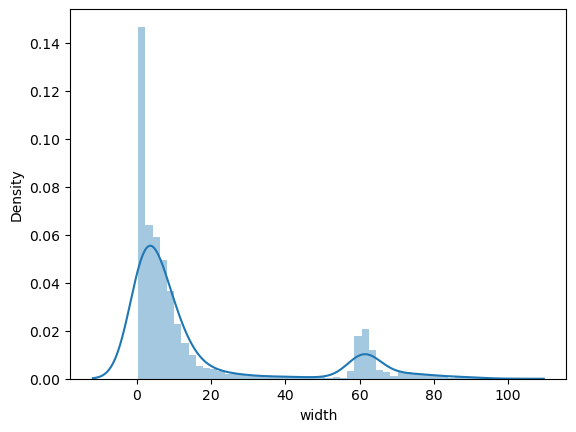

In [17]:
sns.distplot(tmp.xs('lognormal', 0, 'model').xs('unsmoothed', 0, 'smoothed')['width'])

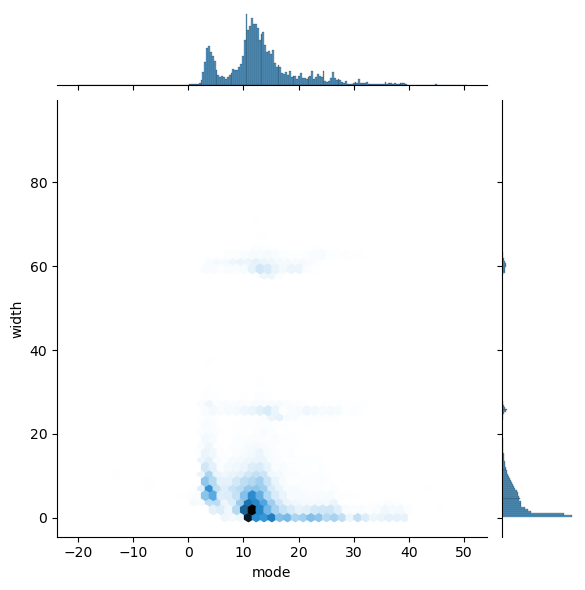

In [72]:
tmp = df.stack('range_n')
tmp = tmp[tmp.cvr2 > 0.00]
sns.jointplot(x='mode', y='width', data=tmp.reset_index(), kind='hex')

In [73]:
df['cvr2'].unstack('model').xs('gaussian', 1, 'model') > df['cvr2'].unstack('model').xs('lognormal', 1, 'model').groupby(['subject', ''])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/1864305381.py", line 1, in <module>
    df['cvr2'].unstack('model').xs('gaussian', 1, 'model') > df['cvr2'].unstack('model').xs('lognormal', 1, 'model').groupby(['subject', ''])
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/frame.py", line 8869, in groupby
    return DataFrameGroupBy(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/groupby/groupby.py", line 1278, in __init__
    grouper, exclusions, obj = get_grouper(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/groupby/grouper.py", line 1009, in get_grouper
    raise KeyError(gpr)
KeyError: ''

During handling of the above exception, another exception occurred:

Traceback (mos

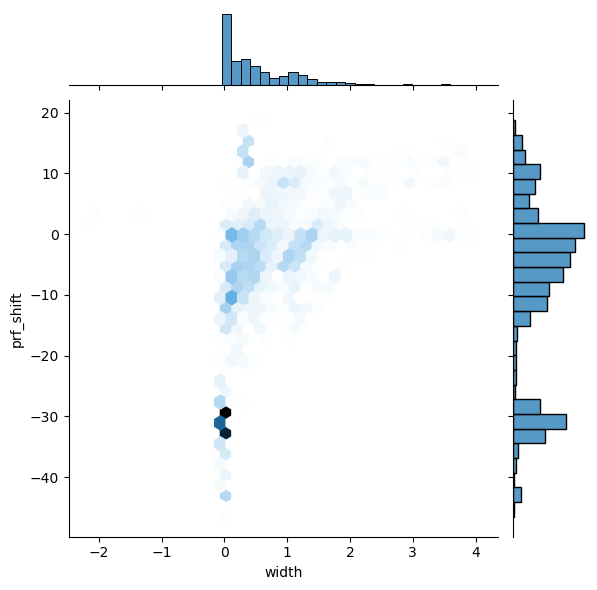

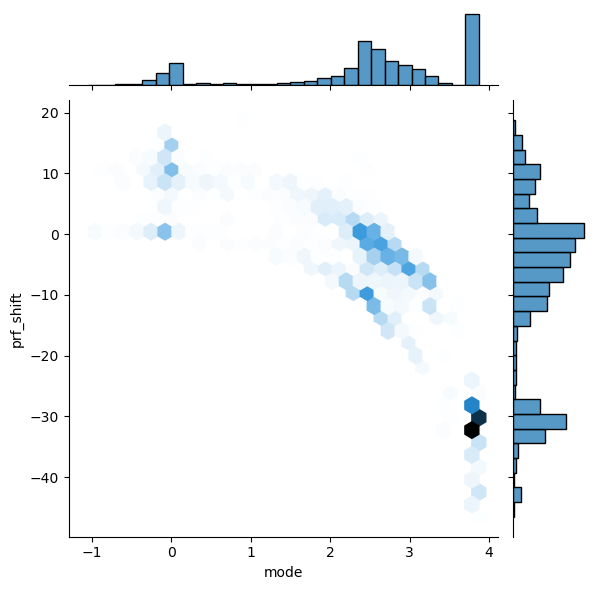

In [ ]:
mask = (df[[('cvr2', 'wide'), ('cvr2', 'narrow')]].mean(1) > 0.01) & (df[('mode', 'narrow')] < 25)
prf_shift = df.loc[mask, ('mode', 'narrow')] - df.loc[mask, ('mode', 'wide')]

tmp = prf_shift.to_frame('prf_shift').join(df[('log_sigma', 'wide')].to_frame('width'))
tmp = tmp.join(df[('log(mode)', 'wide')].to_frame('mode'))

sns.jointplot(y='prf_shift', x='width', data=tmp.reset_index(), kind='hex')
sns.jointplot(y='prf_shift', x='mode', data=tmp.reset_index(), kind='hex')

n         r           CI95%     p-val   BF10     power
range                                                                  
narrow pearson  35 -0.294181   [-0.57, 0.04]  0.086275  0.865  0.411294
wide   pearson  35 -0.424505  [-0.66, -0.11]  0.011032  4.679  0.737316

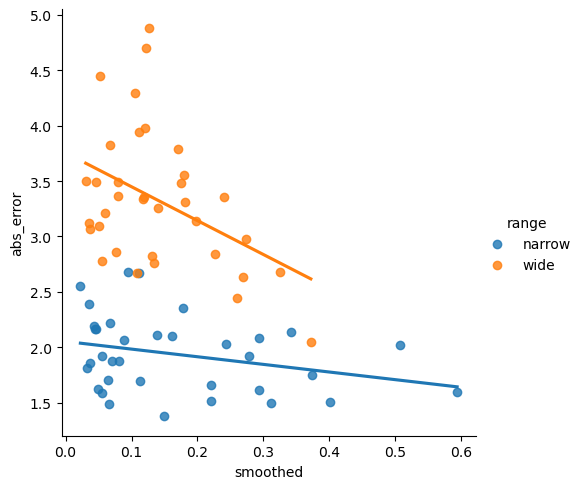

In [113]:
import pingouin as pg
r2 = df.xs('lognormal', 0, level='model').stack('range_n').groupby(['subject', 'session', 'smoothed', 'range_n']).apply(lambda d: (d['cvr2'] > 0.0).mean()).unstack('smoothed')

r2.index.set_names('range', level='range_n', inplace=True)

tmp = behavior.groupby(['subject', 'range'])[['abs_error']].mean().join(r2)

sns.lmplot(x='smoothed', y='abs_error', hue='range', data=tmp.reset_index(), ci=None)

tmp.groupby(['range']).apply(lambda d: pg.corr(d['abs_error'], d['smoothed'], method='pearson'))

n         r           CI95%     p-val   BF10     power
pearson  35 -0.390803  [-0.64, -0.07]  0.020275  2.797  0.656752

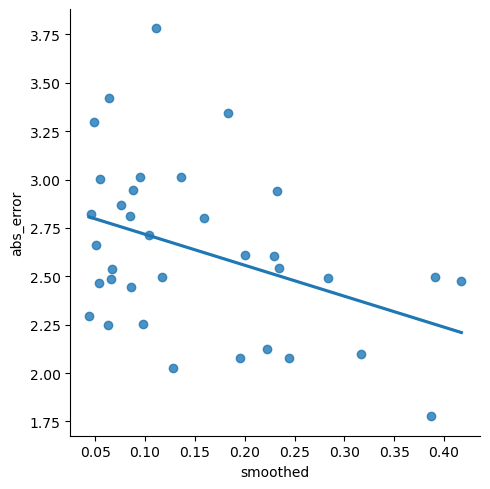

In [114]:
import pingouin as pg
r2 = df.xs('lognormal', 0, 'model').stack('range_n').groupby(['subject', 'session', 'smoothed', 'range_n']).apply(lambda d: (d['cvr2'] > 0.0).mean()).unstack('smoothed')

r2.index.set_names('range', level='range_n', inplace=True)

tmp = behavior.groupby(['subject'])[['abs_error']].mean().join(r2.loc[(slice(None), 'both', ['narrow', 'wide'])].groupby('subject').mean())

sns.lmplot(x='smoothed', y='abs_error', data=tmp.reset_index(), ci=None)

pg.corr(tmp['abs_error'], tmp['smoothed'], method='pearson')

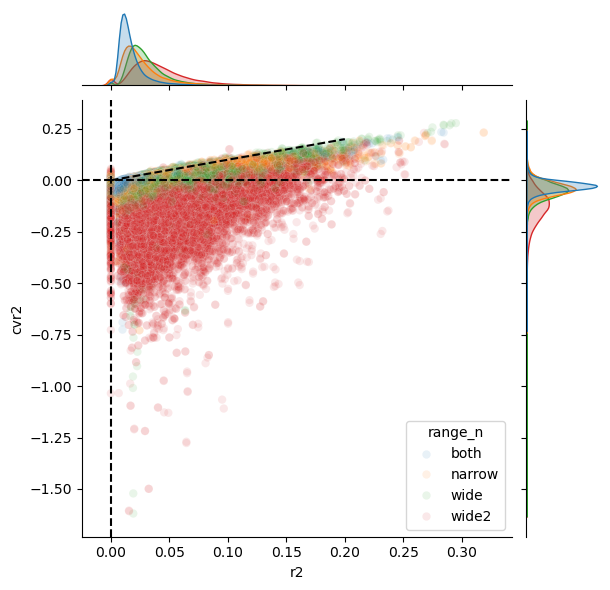

In [77]:
tmp = df.stack(1)


sns.jointplot(data=tmp, x='r2', y='cvr2', hue='range_n', alpha=0.1)
plt.axhline(0.0, c='k', ls='--')
plt.axvline(0.0, c='k', ls='--')
plt.plot([0, .2], [0, .2], c='k', ls='--')

In [ ]:
df.groupby(['subject', 'session', 'smoothed']).apply(lambda d: (d[[('cvr2', 'wide'), ('cvr2', 'narrow')]] > 0.00).any(axis=1).mean()).unstack('smoothed')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/3949405686.py", line 1, in <module>
    df.groupby(['subject', 'session', 'smoothed']).apply(lambda d: (d[[('cvr2', 'wide'), ('cvr2', 'narrow')]] > 0.00).any(axis=1).mean()).unstack('smoothed')
NameError: name 'df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/py

In [ ]:
df.groupby(['subject', 'session', 'smoothed']).apply(lambda d: (d[[('cvr2', 'wide'), ('cvr2', 'narrow')]] > 0.00).all(axis=1).mean()).unstack('smoothed')

smoothed         smoothed  unsmoothed
subject session                      
01      both     0.001297    0.003891
02      both     0.020349    0.010465
03      both     0.004202    0.002801
04      both     0.053548    0.028387
05      both     0.006647    0.006647
06      both     0.015528    0.008696
07      both     0.153027    0.034753
08      both     0.048742    0.011792
09      both     0.081633    0.024333
10      both     0.014805    0.004038
12      both     0.234831    0.087079
13      both     0.252934    0.086854
14      both     0.016875    0.005000
15      both     0.021682    0.015112
16      both     0.070175    0.024854
17      both     0.028205    0.014744
18      both     0.005362    0.004692
19      both     0.138202    0.054494
20      both     0.067889    0.015362
21      both     0.004386    0.003133
22      both     0.069691    0.019645
24      both     0.009054    0.003018

# Narrow vs wide

In [115]:
# Let's filter out anything where the cross-validated  is less 0 for both ranges combined
# tmp = df.stack(['subject'])
# Make sure subject is first index

# set order of index
tmp = df.copy().droplevel(-1).reorder_levels(['subject', 'session', 'smoothed', 'model']).sort_index()
tmp = tmp[(tmp[[('cvr2', 'wide'), ('cvr2', 'narrow')]] > 0.01).any(axis=1)]
tmp = tmp[(tmp[[('r2', 'wide'), ('r2', 'narrow')]] > 0.01).all(axis=1)]
# tmp = tmp[(tmp[[('amplitude', 'wide'), ('amplitude', 'narrow')]] > 0.01).all(axis=1)]

# tmp = tmp[(tmp[('mode', 'wide')] > 10.) & (tmp[('mode', 'narrow')] > 10.)]

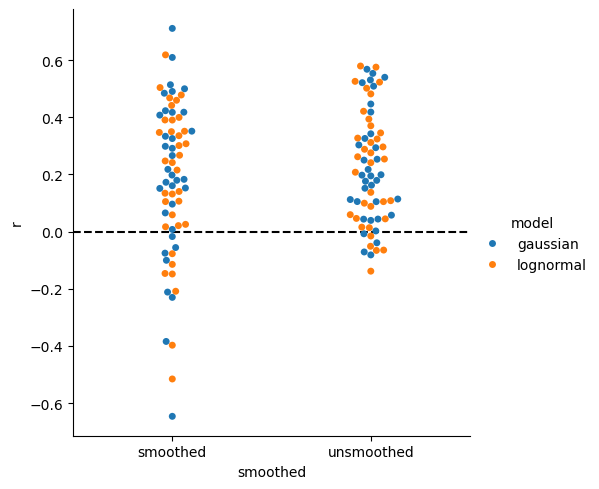

In [116]:
import pingouin as pg
r = tmp.groupby(['subject', 'smoothed', 'model']).apply(lambda d: pg.corr(d[('mode', 'narrow')], d[('mode', 'wide')]) if len(d) > 1 else pd.Series([0.0], index=['r']))


sns.catplot(x='smoothed', y='r', data=r.reset_index(), hue='model', kind='swarm')
plt.axhline(0.0, c='k', ls='--')

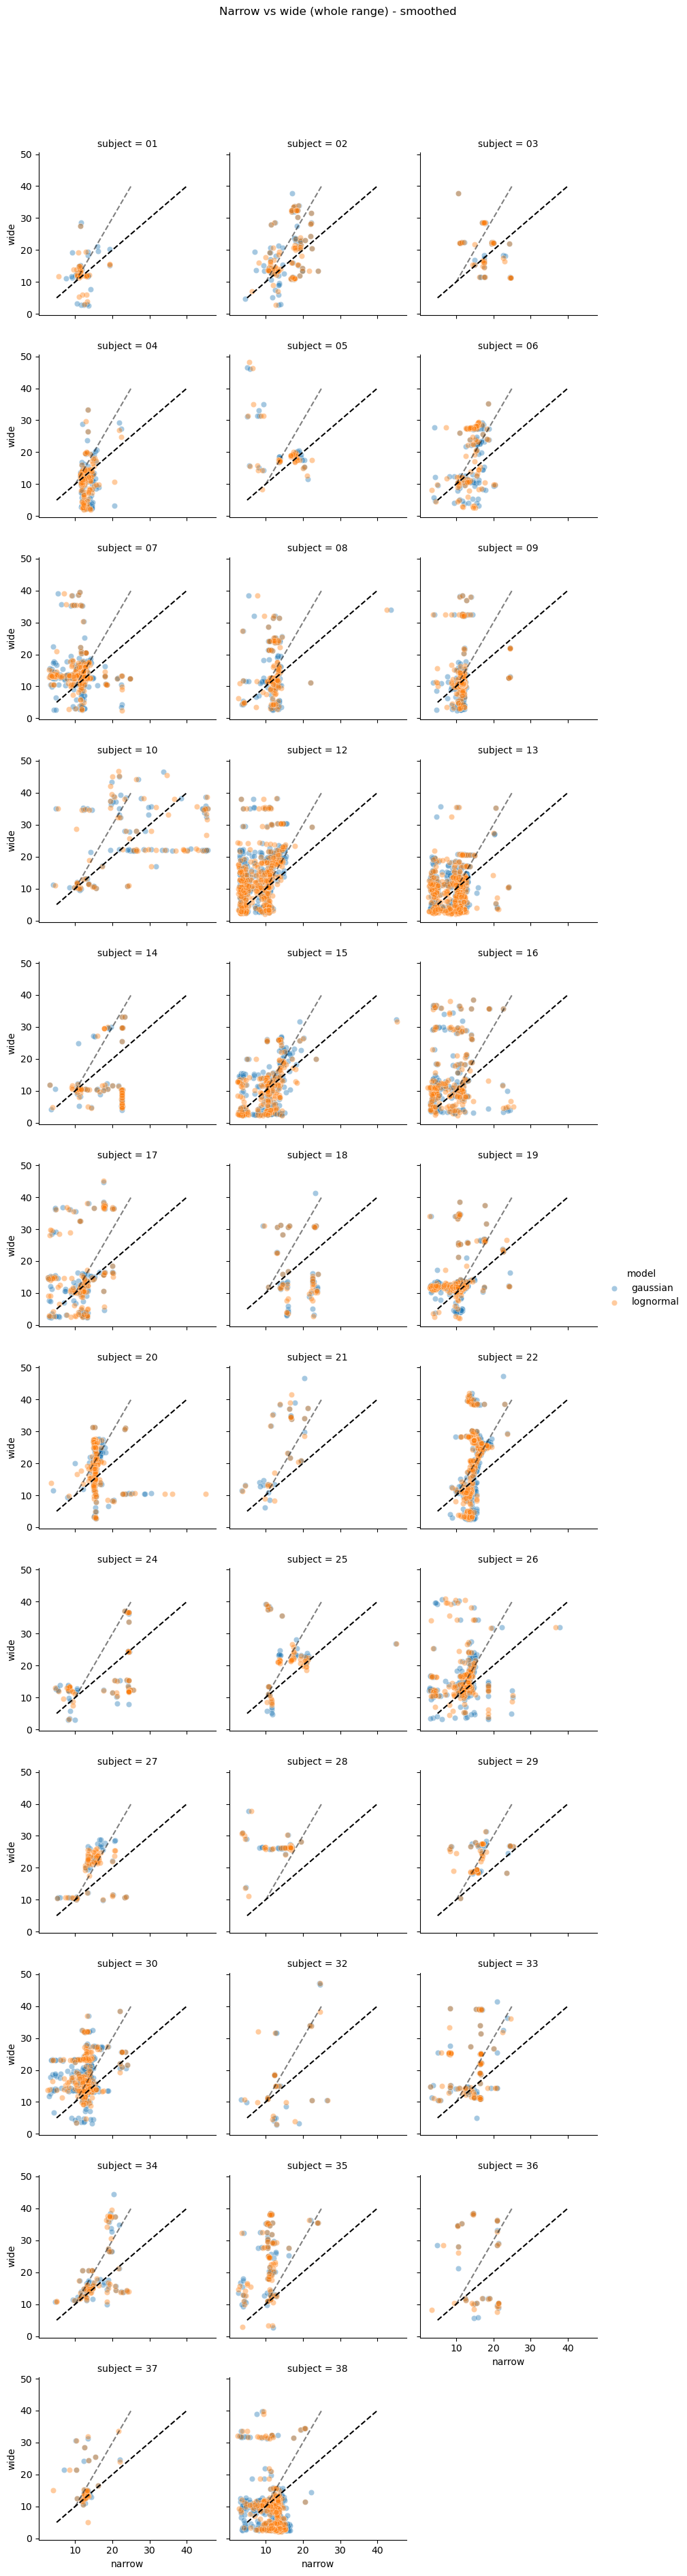

<Figure size 640x480 with 0 Axes>

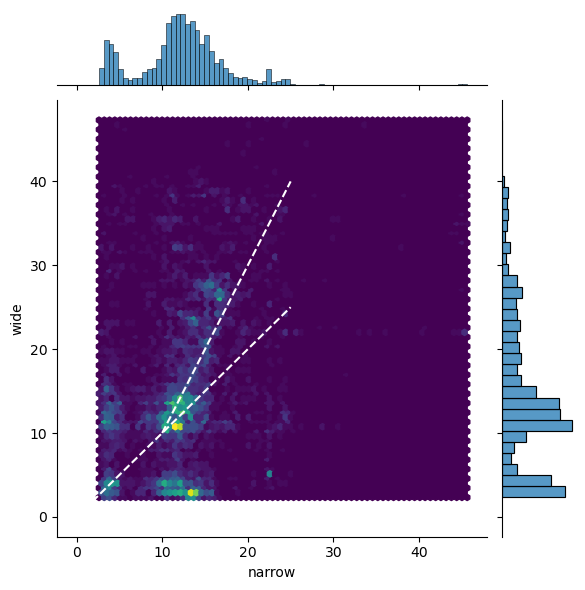

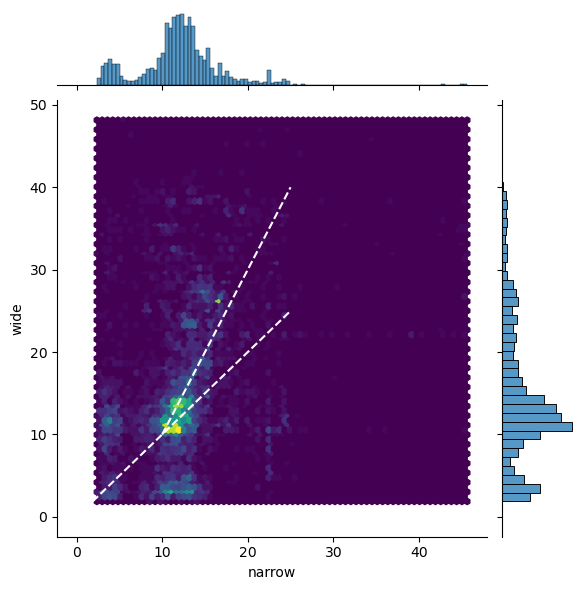

In [118]:
g = sns.FacetGrid(tmp.xs('smoothed', 0, 'smoothed')['mode'].reset_index(), col='subject', col_wrap=3, hue='model')

g.map(sns.scatterplot, 'narrow', 'wide', alpha=0.4)
for ax in g.axes.flat:
    ax.plot([5, 40], [5, 40], color='black', linestyle='--')
    ax.plot([10, 25], [10, 40], color='black', linestyle='--', alpha=0.5)

g.add_legend()
g.fig.suptitle('Narrow vs wide (whole range) - smoothed', y=1.05)
plt.figure()

sns.jointplot(data=tmp.xs('smoothed', 0, 'smoothed').xs('gaussian', 0, 'model')['mode'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=70)
plt.plot([0, 25], [0, 25], color='white', linestyle='--')
plt.plot([10, 25], [10, 40], color='white', linestyle='--')

sns.jointplot(data=tmp.xs('smoothed', 0, 'smoothed').xs('lognormal', 0, 'model')['mode'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=70)
plt.plot([0, 25], [0, 25], color='white', linestyle='--')
plt.plot([10, 25], [10, 40], color='white', linestyle='--')

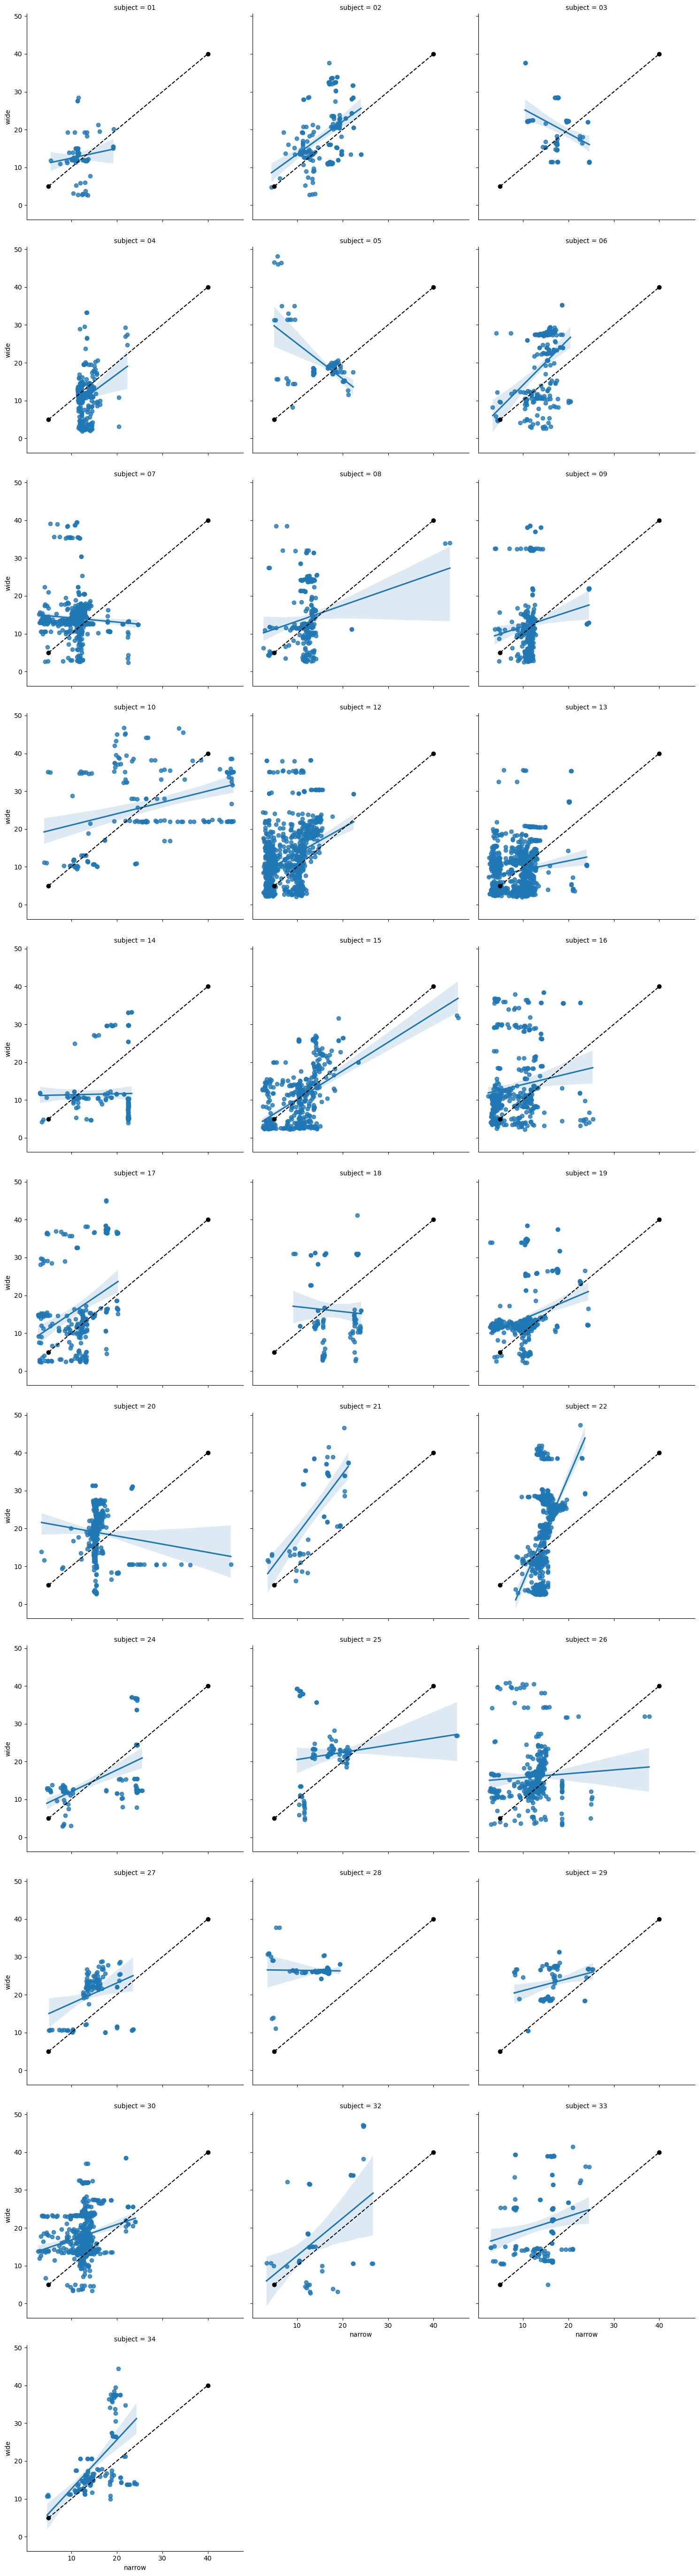

In [86]:
g = sns.lmplot(data=tmp.xs('smoothed', 0, 'smoothed')['mode'].reset_index(), x='narrow', y='wide', col='subject', col_wrap=3)

g.map(lambda x, y, **kwargs: plt.plot(x, y, **kwargs), x=[5, 40], y=[5, 40], color='black', linestyle='--')

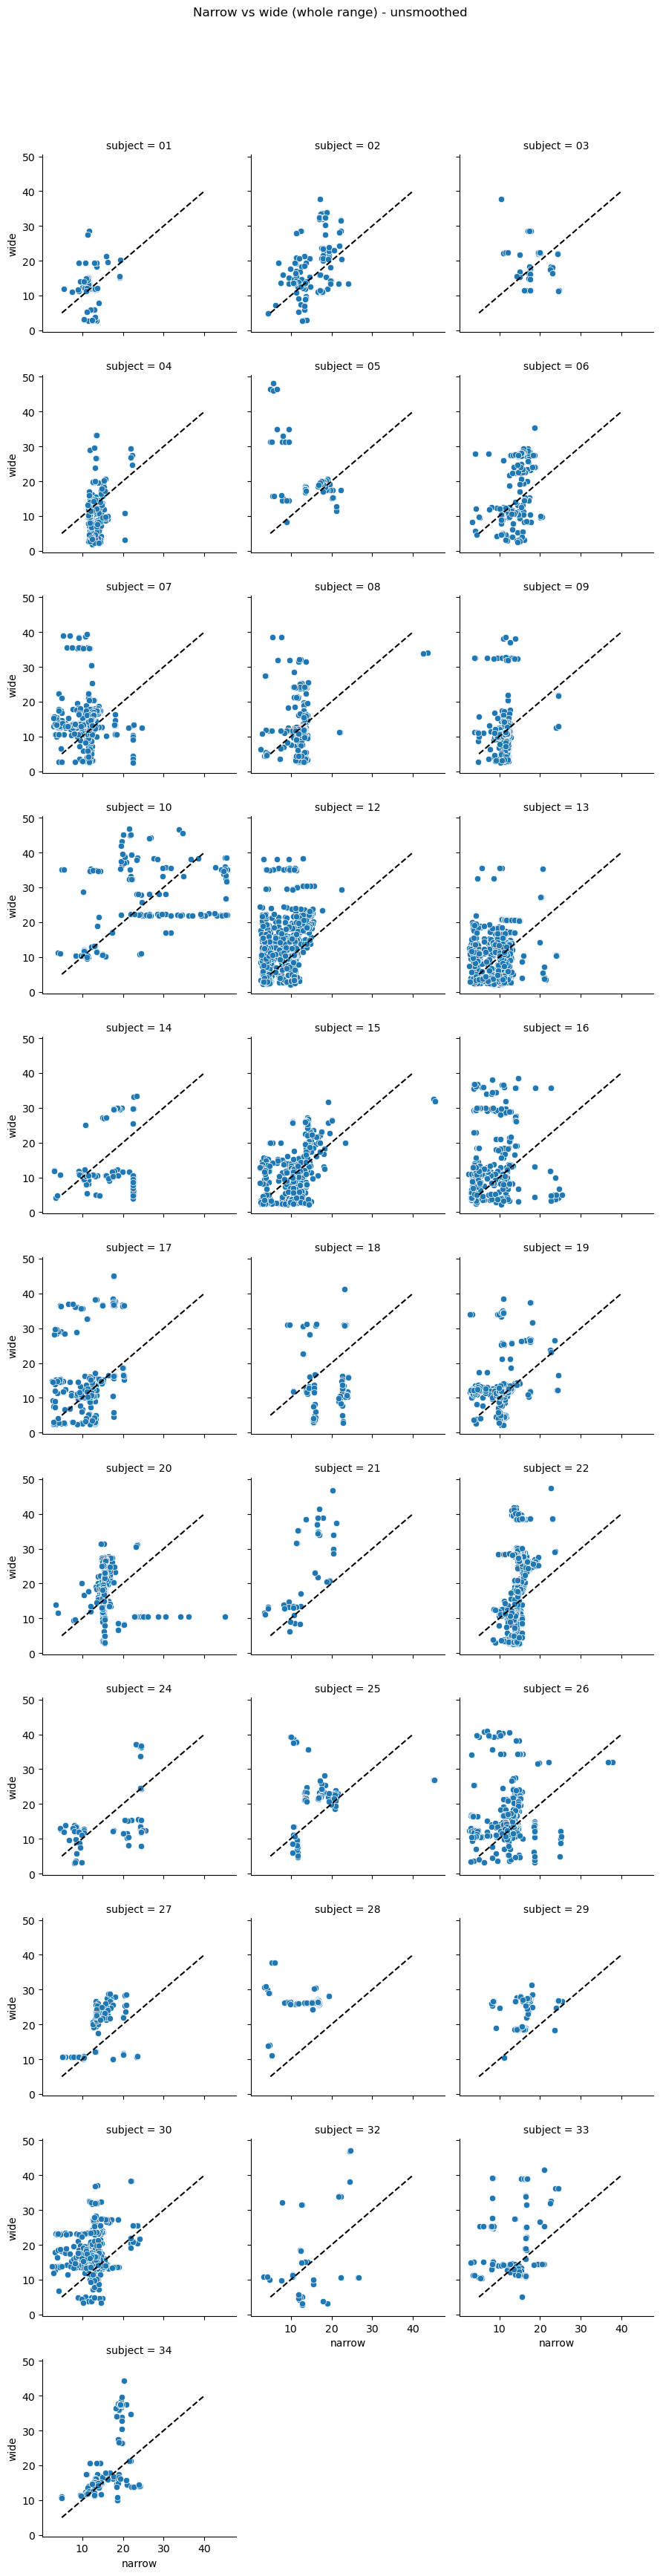

<Figure size 640x480 with 0 Axes>

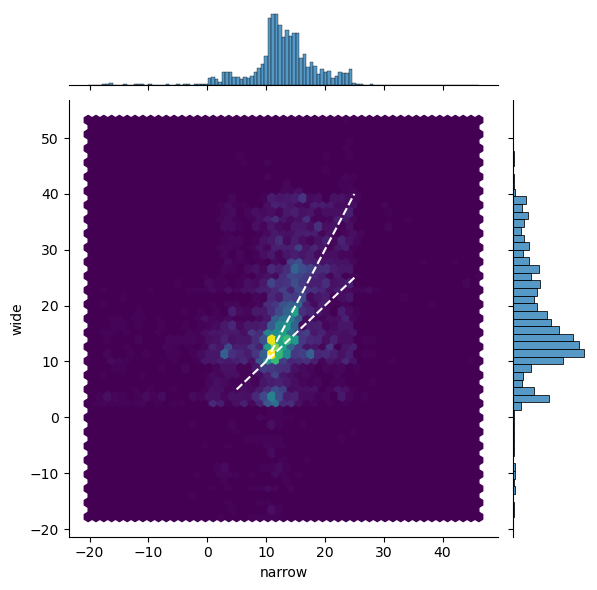

In [88]:
g = sns.FacetGrid(tmp.xs('smoothed', 0, 'smoothed')['mode'].reset_index(), col='subject', col_wrap=3)

g.map(sns.scatterplot, 'narrow', 'wide')
for ax in g.axes.flat:
    ax.plot([5, 40], [5, 40], color='black', linestyle='--')


g.fig.suptitle('Narrow vs wide (whole range) - unsmoothed', y=1.05)

plt.figure()

sns.jointplot(data=tmp.xs('unsmoothed', 0, 'smoothed')['mode'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=50)
plt.plot([5, 25], [5, 25], color='white', linestyle='--')
plt.plot([10, 25], [10, 40], color='white', linestyle='--')

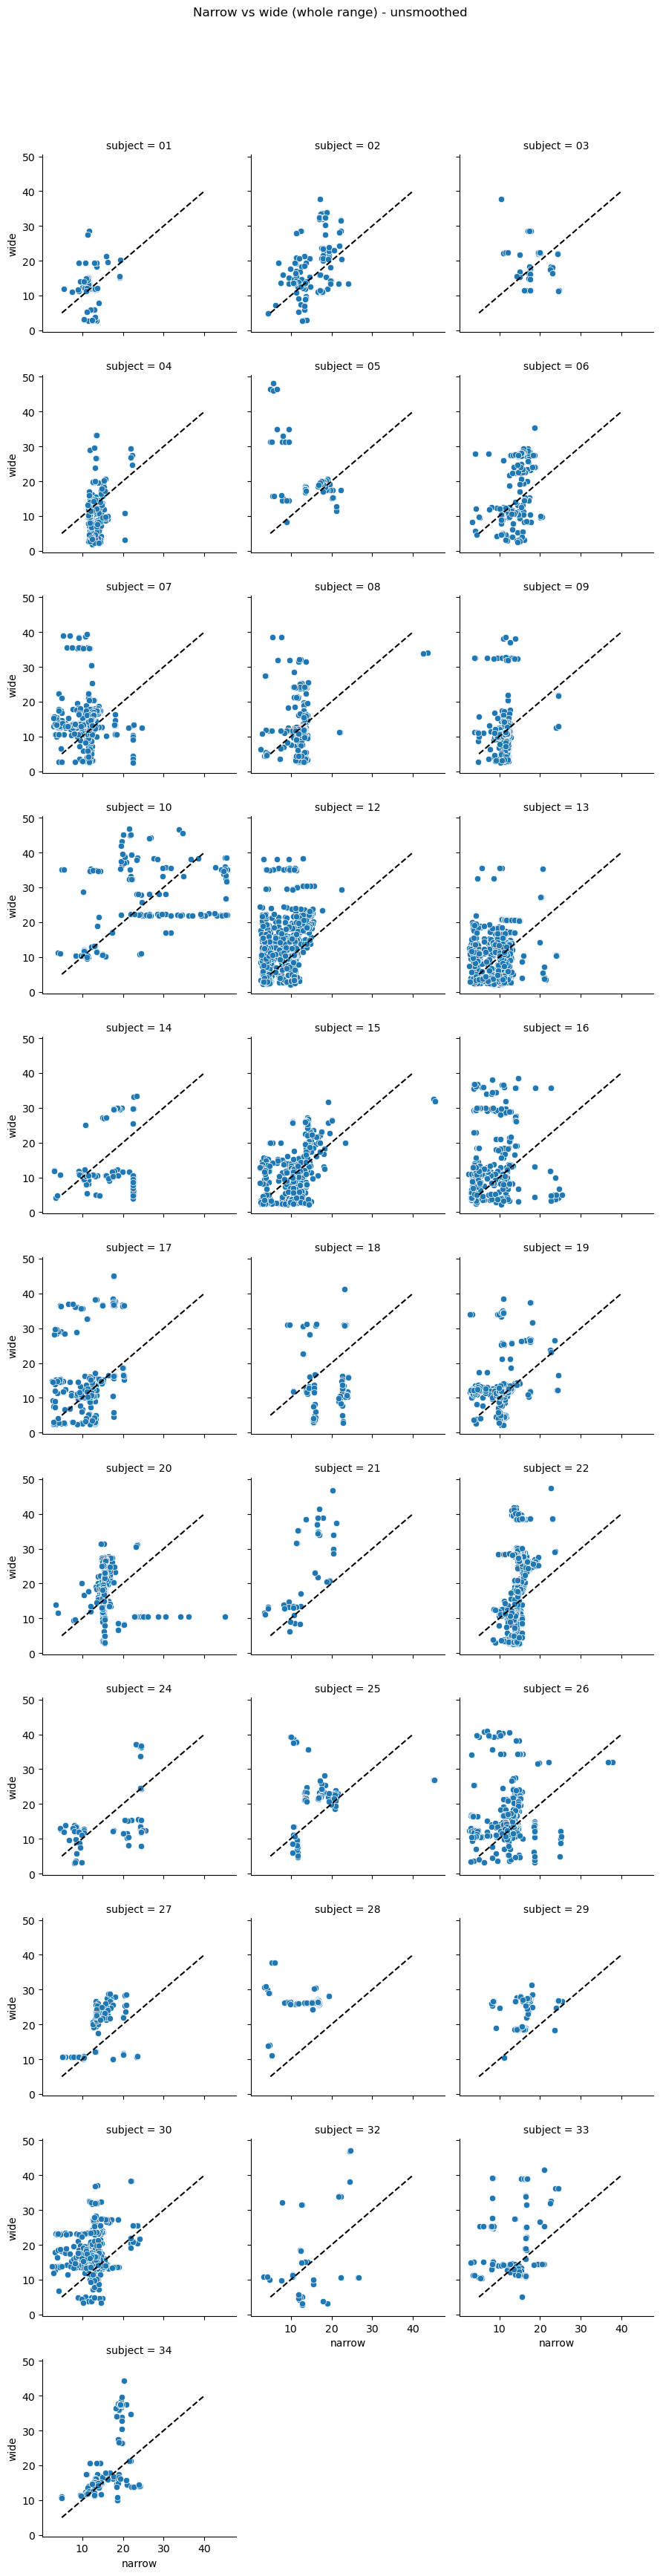

<Figure size 640x480 with 0 Axes>

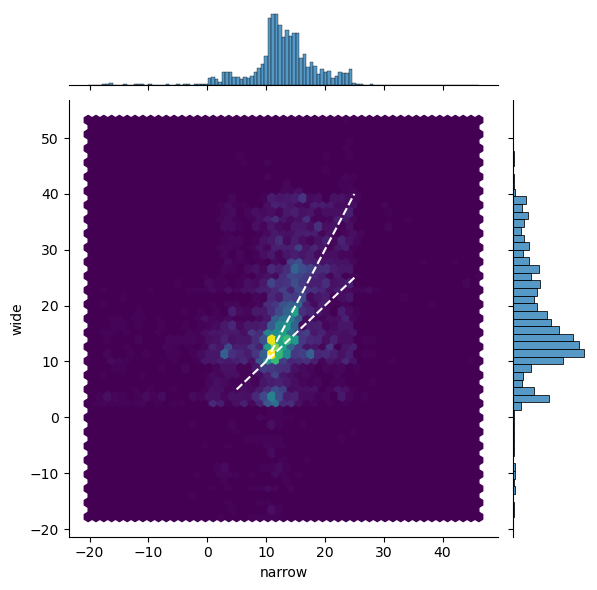

In [89]:
g = sns.FacetGrid(tmp.xs('smoothed', 0, 'smoothed')['mode'].reset_index(), col='subject', col_wrap=3)

g.map(sns.scatterplot, 'narrow', 'wide')
for ax in g.axes.flat:
    ax.plot([5, 40], [5, 40], color='black', linestyle='--')


g.fig.suptitle('Narrow vs wide (whole range) - unsmoothed', y=1.05)

plt.figure()

sns.jointplot(data=tmp.xs('unsmoothed', 0, 'smoothed')['mode'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=50)
plt.plot([5, 25], [5, 25], color='white', linestyle='--')
plt.plot([10, 25], [10, 40], color='white', linestyle='--')

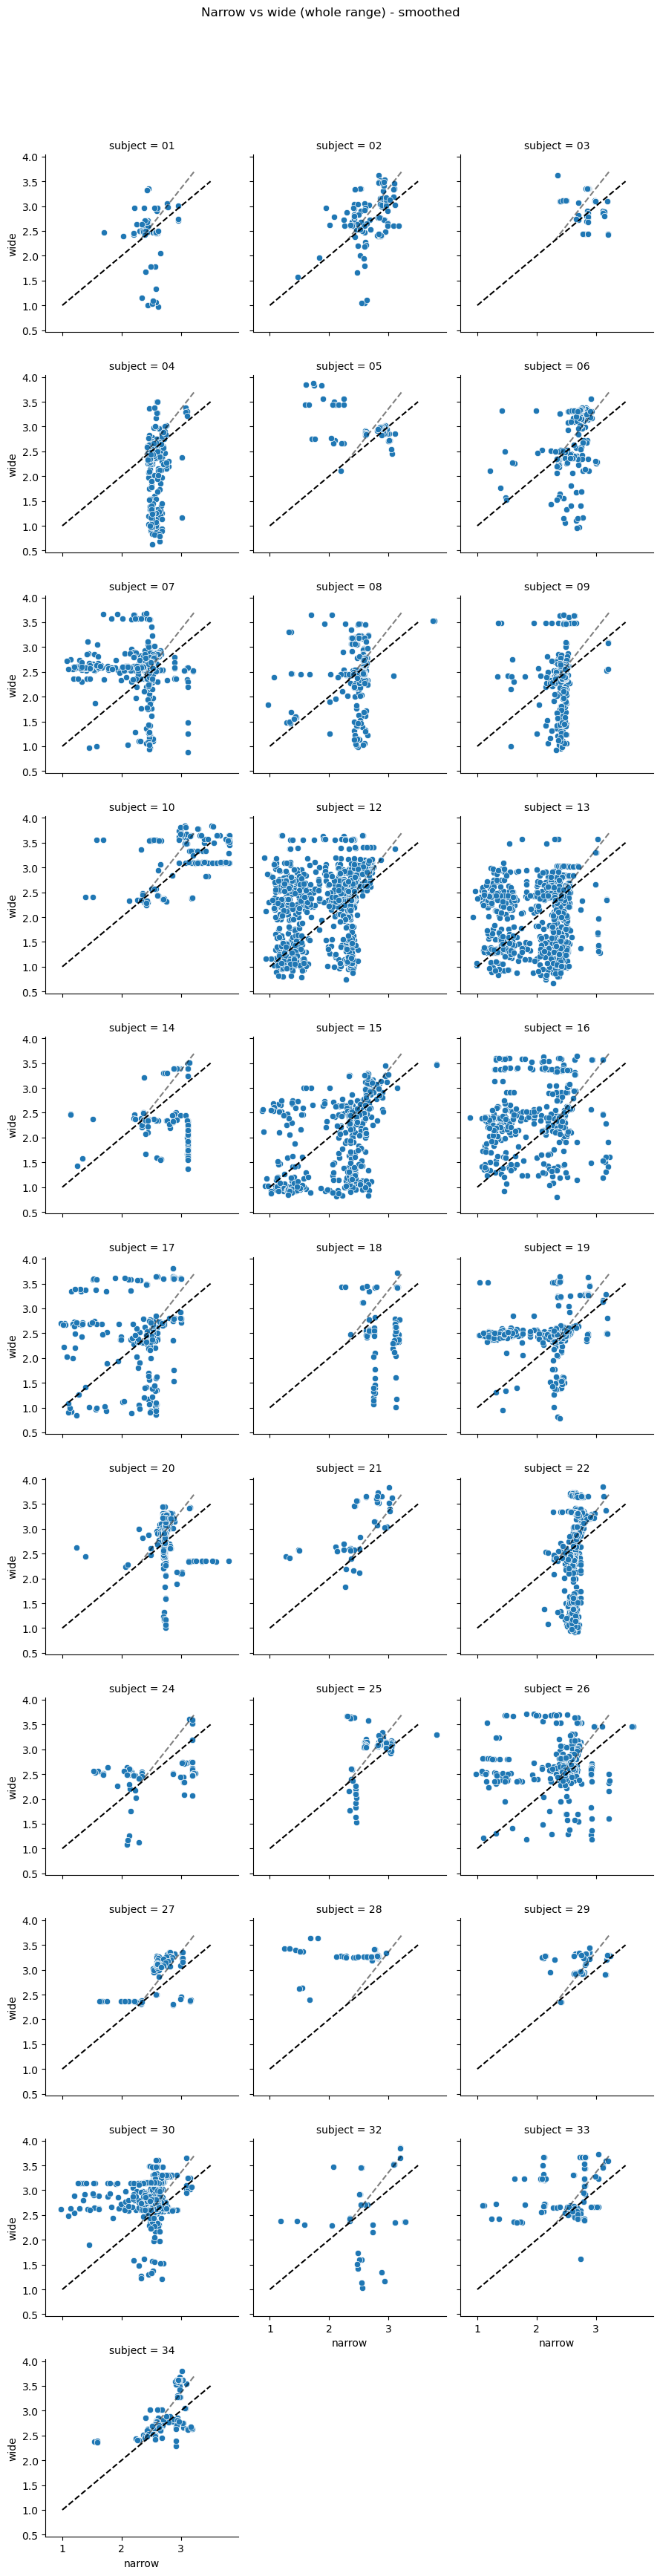

<Figure size 640x480 with 0 Axes>

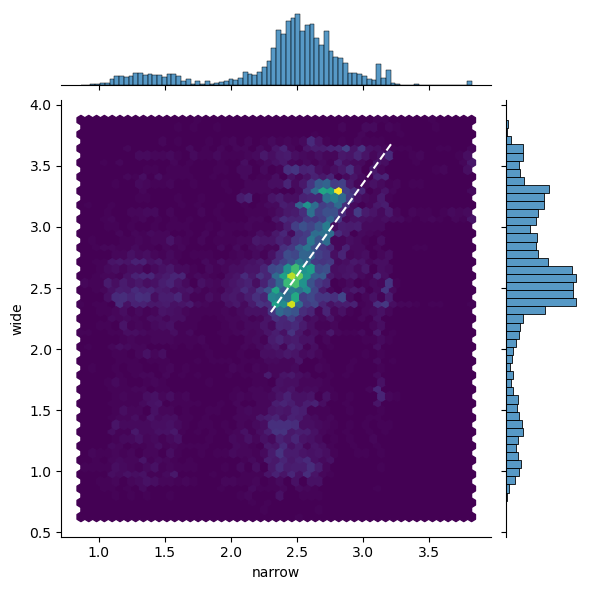

In [84]:
g = sns.FacetGrid(tmp.xs('smoothed', 0, 'smoothed')['log(mode)'].reset_index(), col='subject', col_wrap=3)

g.map(sns.scatterplot, 'narrow', 'wide')

for ax in g.axes.flat:
    ax.plot([1, 3.5], [1, 3.5], color='black', linestyle='--')
    ax.plot([np.log(10), np.log(25)], [np.log(10), np.log(40)], color='black', linestyle='--', alpha=0.5)

g.fig.suptitle('Narrow vs wide (whole range) - smoothed', y=1.05)
plt.figure()

sns.jointplot(data=tmp.xs('smoothed', 0, 'smoothed')['log(mode)'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=50)

plt.plot([np.log(10),np.log(25)], [np.log(10), np.log(40)], color='white', linestyle='--')

In [90]:
g = sns.FacetGrid(tmp.xs('smoothed', 0, 'smoothed')['fwhm'].reset_index(), col='subject', col_wrap=3)

g.map(sns.scatterplot, 'narrow', 'wide')
for ax in g.axes.flat:
    ax.plot([5, 40], [5, 40], color='black', linestyle='--')


g.fig.suptitle('FWHM Narrow vs wide (whole range) - smoothed', y=1.05)
plt.figure()

sns.jointplot(data=tmp.xs('smoothed', 0, 'smoothed')['mode'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=35)
plt.plot([5, 15], [5, 15], color='white', linestyle='--')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'fwhm'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/3058465143.py", line 1, in <module>
    g = sns.FacetGrid(tmp.xs(

In [91]:
g = sns.FacetGrid(tmp.xs('unsmoothed', 0, 'smoothed')['fwhm'].reset_index(), col='subject', col_wrap=3)

g.map(sns.scatterplot, 'narrow', 'wide')
for ax in g.axes.flat:
    ax.plot([5, 40], [5, 40], color='black', linestyle='--')


g.fig.suptitle('FWHM Narrow vs wide (whole range) - unsmoothed', y=1.05)
plt.figure()

sns.jointplot(data=tmp.xs('unsmoothed', 0, 'smoothed')['mode'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=35)
plt.plot([5, 15], [5, 15], color='white', linestyle='--')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'fwhm'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/236773436.py", line 1, in <module>
    g = sns.FacetGrid(tmp.xs('

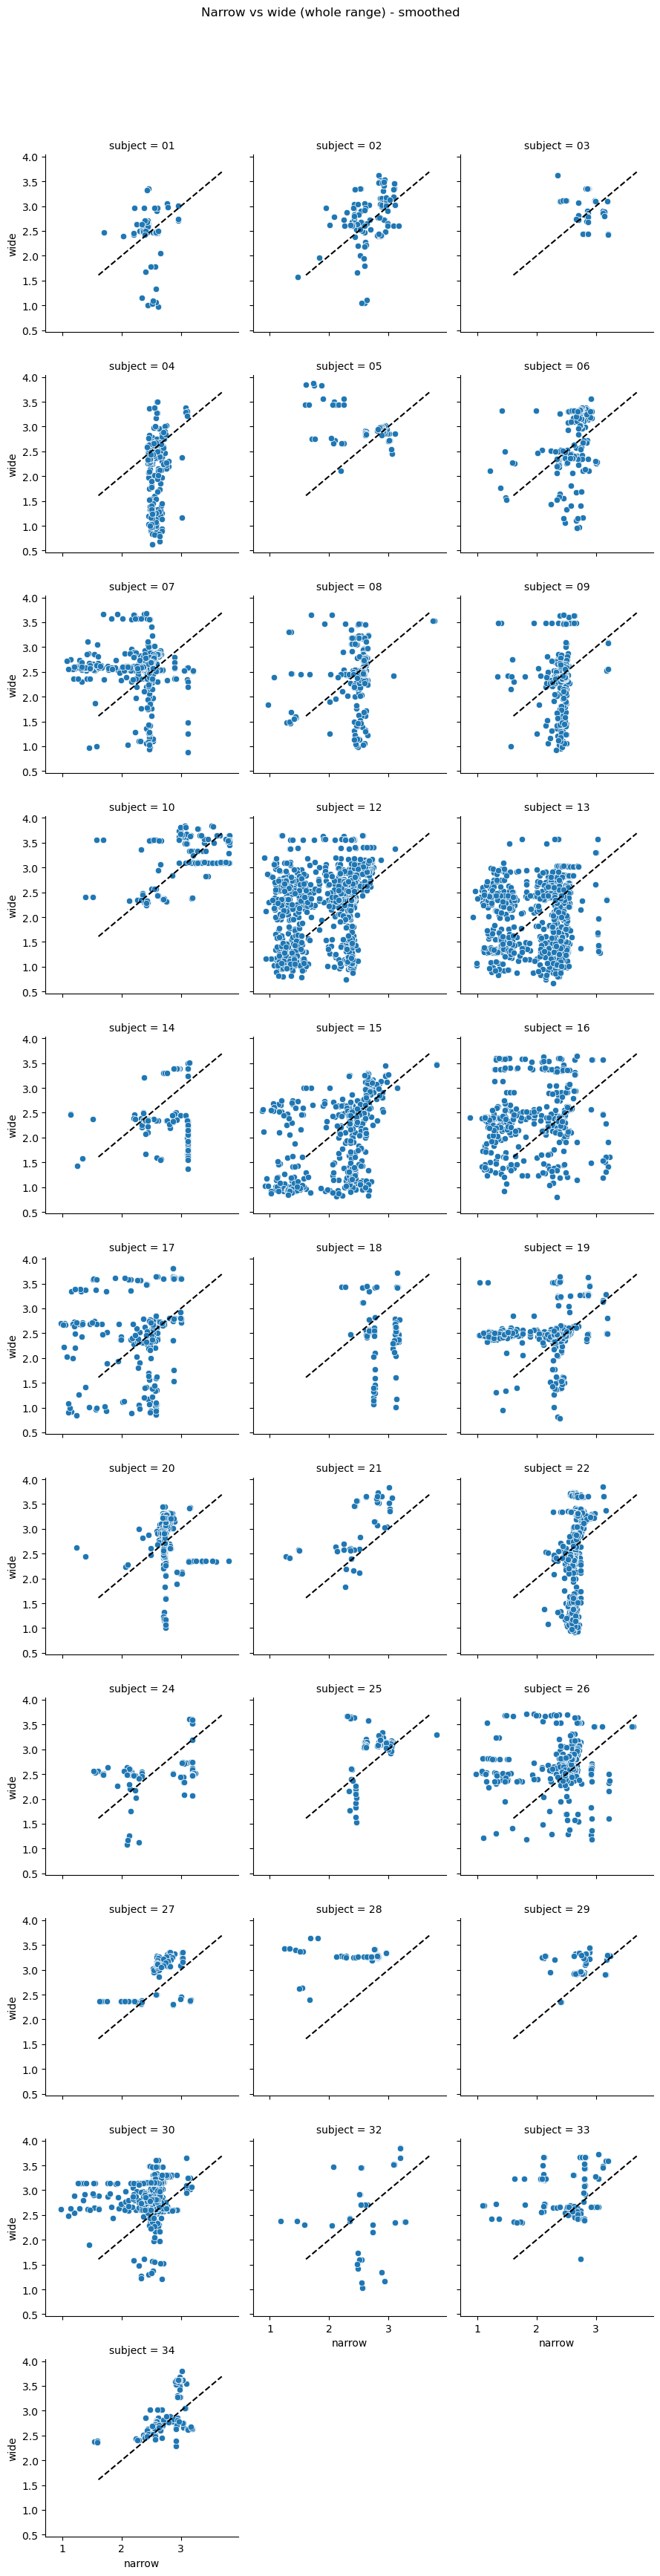

<Figure size 640x480 with 0 Axes>

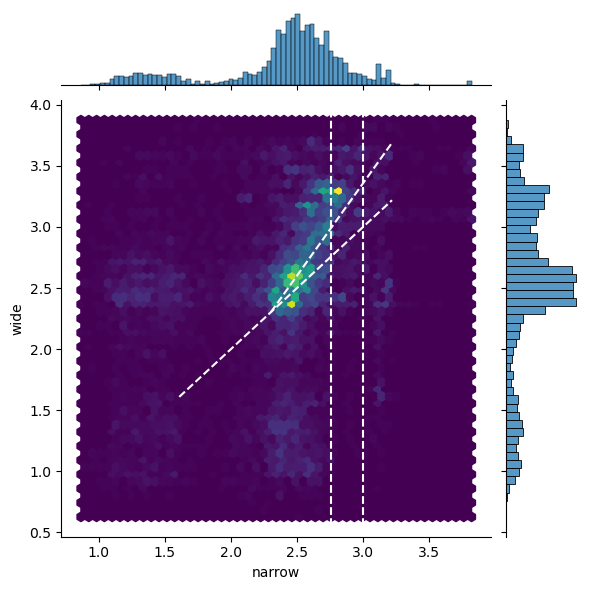

In [92]:
g = sns.FacetGrid(tmp.xs('smoothed', 0, 'smoothed')['log(mode)'].reset_index(), col='subject', col_wrap=3)

g.map(sns.scatterplot, 'narrow', 'wide')
for ax in g.axes.flat:
    ax.plot([np.log(5), np.log(40)], [np.log(5), np.log(40)], color='black', linestyle='--')
#     ax.plot([10, 25], [10, 40], color='black', linestyle='--', alpha=0.5)


g.fig.suptitle('Narrow vs wide (whole range) - smoothed', y=1.05)
plt.figure()

sns.jointplot(data=tmp.xs('smoothed', 0, 'smoothed')['log(mode)'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=50)
plt.plot([np.log(5), np.log(25)], [np.log(5), np.log(25)], color='white', linestyle='--')
plt.plot([np.log(10), np.log(25)], [np.log(10), np.log(40)], color='white', linestyle='--')

plt.axvline((np.log(25) + np.log(10))/2., c='w', ls='--')
plt.axvline((np.log(40) + np.log(10))/2., c='w', ls='--')

In [93]:
# tmp = df['mode']

import bambi as bmb

# bmb.model()

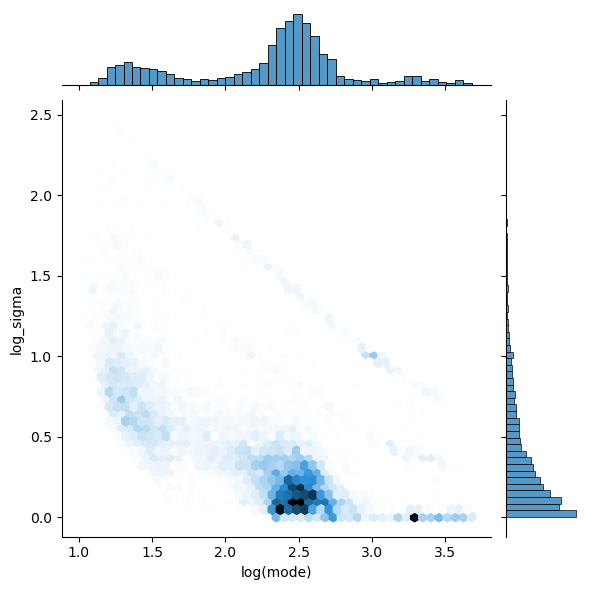

In [94]:
sns.jointplot(x='log(mode)', y='log_sigma', data=tmp[tmp[('cvr2', 'both')] > 0.0].xs('both', axis=1, level='range_n'), kind='hex')

In [39]:
plt.hexbin?

Signature:
plt.hexbin(
    x,
    y,
    C=None,
    gridsize=100,
    bins=None,
    xscale='linear',
    yscale='linear',
    extent=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    edgecolors='face',
    reduce_C_function=<function mean at 0x104ef28b0>,
    mincnt=None,
    marginals=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Make a 2D hexagonal binning plot of points *x*, *y*.

If *C* is *None*, the value of the hexagon is determined by the number
of points in the hexagon. Otherwise, *C* specifies values at the
coordinate (x[i], y[i]). For each hexagon, these values are reduced
using *reduce_C_function*.

Parameters
----------
x, y : array-like
    The data positions. *x* and *y* must be of the same length.

C : array-like, optional
    If given, these values are accumulated in the bins. Otherwise,
    every point has a value of 1. Must be of the same length as *x*
    and *y*.

gridsize : int or (int, int), def

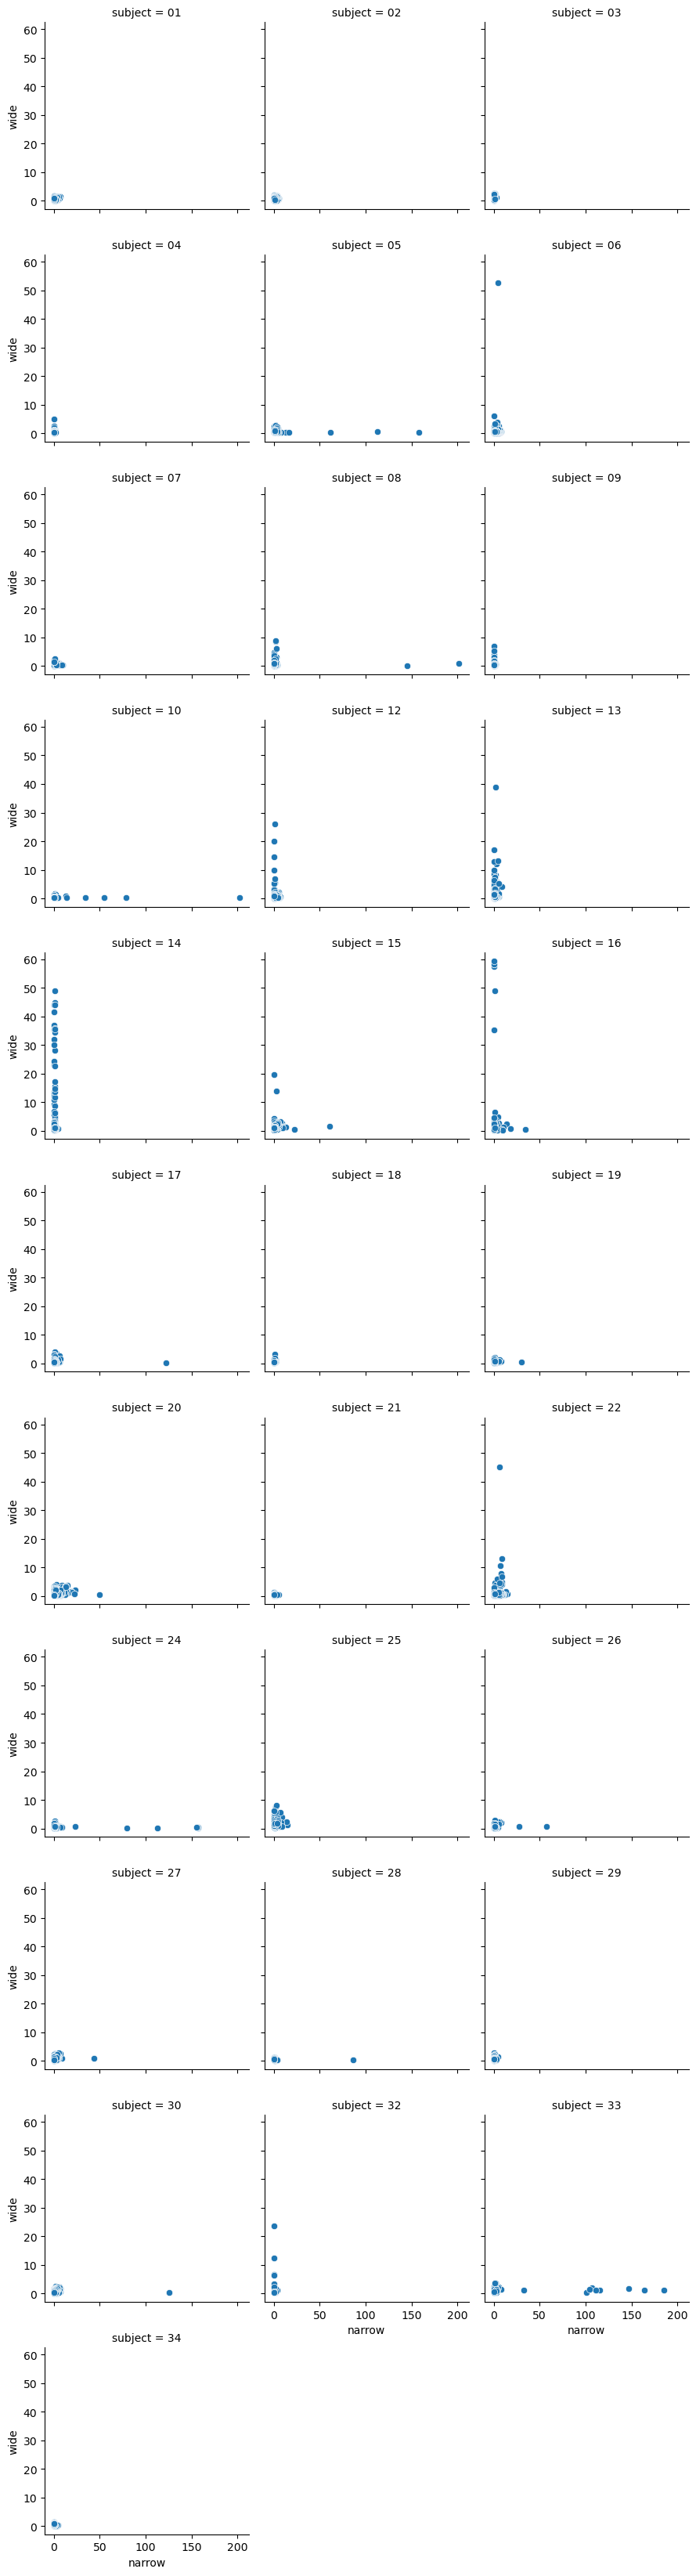

<Figure size 640x480 with 0 Axes>

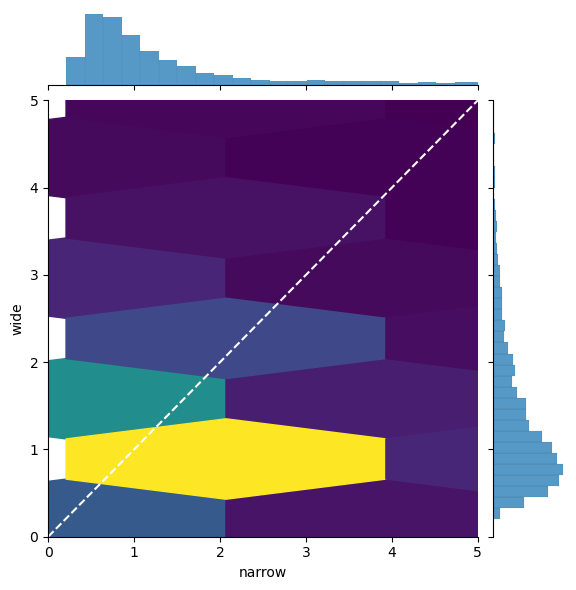

In [95]:
g = sns.FacetGrid(tmp.xs('smoothed', 0, 'smoothed')['amplitude'].reset_index(), col='subject', col_wrap=3)

g.map(sns.scatterplot, 'narrow', 'wide')
plt.figure()

g = sns.jointplot(data=tmp.xs('unsmoothed', 0, 'smoothed')['amplitude'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=100)

g.ax_joint.set_xlim(0, 5)
g.ax_joint.set_ylim(0, 5)

g.ax_joint.plot([0, 5], [0, 5], color='white', linestyle='--')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/110037817.py", line 1, in <module>
    sns.jointplot(x='fwhm', y='log_sigma', data=tmp[tmp[('cvr2', 'both')] > 0.0].xs('both', axis=1, level='range_n'), kind='hex')
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py", line 2243, in jointplot
    grid = JointGrid(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py", line 1728, in __init__
    p = VectorPlotter(data=data, variables=dict(x=x, y=y, hue=hue))
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/_base.py", line 634, in __init__
    self.assign_variables(data, variables)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/_base.py", line 679, in assign_v

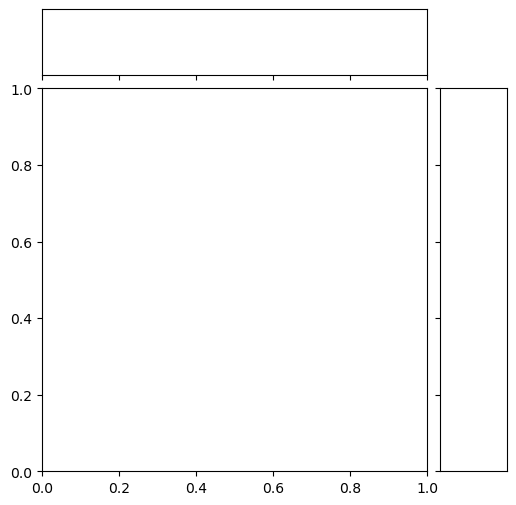

In [96]:
sns.jointplot(x='fwhm', y='log_sigma', data=tmp[tmp[('cvr2', 'both')] > 0.0].xs('both', axis=1, level='range_n'), kind='hex')

In [ ]:
mptmp

# Narrow vs wide 2

In [119]:
df

mode                        \
range_n                                          both     narrow       wide   
subject session smoothed   model     voxel                                    
01      both    smoothed   gaussian  0      37.348385  21.124500  37.364826   
                                     1      33.821358   4.783791  33.824623   
                                     2      28.558237  11.896777  28.557991   
                                     3      15.078053  12.634756  15.576399   
                                     4      11.579211   8.140844  11.836634   
...                                               ...        ...        ...   
38      both    unsmoothed lognormal 697    10.229712   8.885281  12.469304   
                                     698    34.200348  15.089097  34.203670   
                                     699    30.141250  14.106132  30.144490   
                                     700     5.250547   0.066041  33.449802   
                                     701     9.320704   9.556104   9.807035   

                                                          width             \
range_n                                         wide2      both     narrow   
subject session smoothed   model     voxel                                   
01      both    smoothed   gaussian  0      11.517796  0.346775   0.396827   
                                     1      11.687057  0.667084   4.528500   
                                     2      15.473819  0.399016   0.934195   
                                     3      15.590551  1.203502   2.400554   
                                     4      11.840950  1.052765   0.545360   
...                                               ...       ...        ...   
38      both    unsmoothed lognormal 697    12.464295  5.090913   5.992037   
                                     698    19.987635  2.377719   0.541588   
                                     699    18.580220  1.495902   1.386209   
                                     700    10.435924  2.898417  28.675762   
                                     701     9.833158  6.405400  73.498010   

                                                                amplitude  \
range_n                                         wide     wide2       both   
subject session smoothed   model     voxel                                  
01      both    smoothed   gaussian  0      0.341002  0.906162   1.289311   
                                     1      0.691629  0.466805   0.723414   
                                     2      0.415108  1.315624   0.965211   
                                     3      1.232276  1.414796   0.293359   
                                     4      0.779714  0.820746   0.375336   
...                                              ...       ...        ...   
38      both    unsmoothed lognormal 697    1.548756  1.635462   0.473325   
                                     698    2.495612  9.063538   0.665389   
                                     699    1.478209  0.823841   0.688234   
                                     700    1.025891  0.804578  36.297960   
                                     701    3.218578  3.446455   0.520902   

                                                        ...      cvr2  \
range_n                                         narrow  ...      wide   
subject session smoothed   model     voxel              ...             
01      both    smoothed   gaussian  0        0.680798  ... -0.010679   
                                     1        0.540905  ... -0.077199   
                                     2        0.328446  ... -0.078409   
                                     3        0.272006  ... -0.079311   
                                     4      153.636470  ... -0.054760   
...                                                ...  ...       ...   
38      both    unsmoothed lognormal 697      0.797806  ... -0.032694   
                                     698

In [120]:
# Let's filter out anything where the cross-validated  is less 0 for both ranges combined
# tmp = df.stack(['subject'])
# Make sure subject is first index

# set order of index
tmp = df.copy().droplevel(-1).reorder_levels(['subject', 'session', 'smoothed', 'model']).sort_index()
# tmp = tmp[(tmp[('cvr2', 'both')] > 0.00)]
# tmp = tmp[tmp[[('cvr2', 'wide'), ('cvr2', 'narrow')]].mean(1) > 0.00]
tmp = tmp[(tmp[[('cvr2', 'wide2'), ('cvr2', 'narrow')]] > 0.00).any(axis=1)]

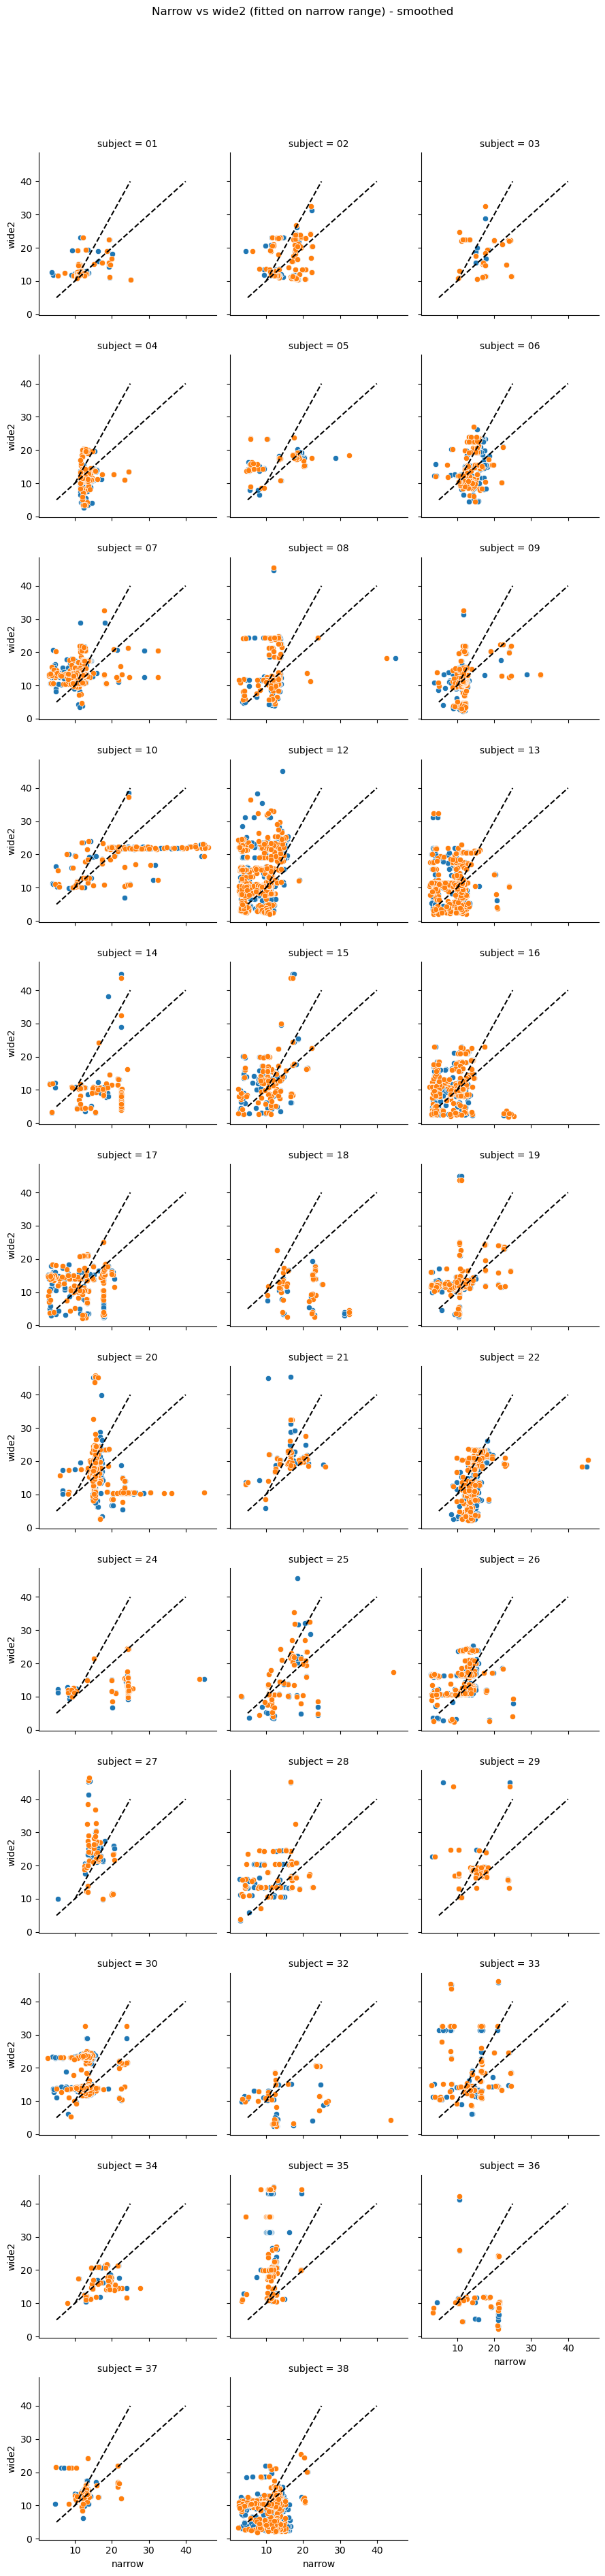

<Figure size 640x480 with 0 Axes>

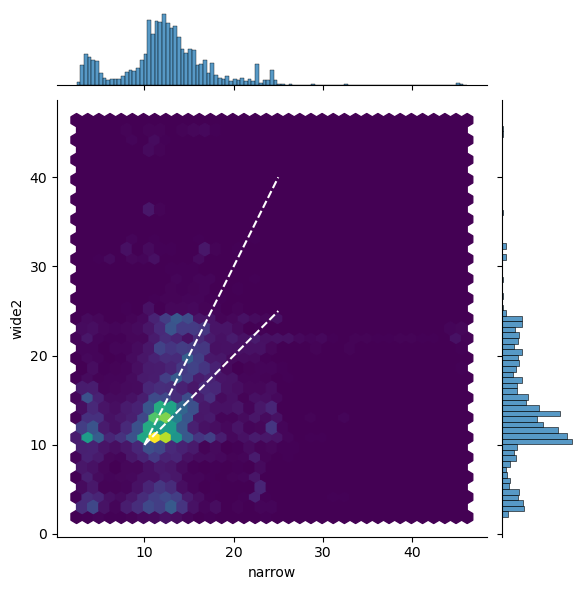

In [121]:
g = sns.FacetGrid(tmp.xs('smoothed', 0, 'smoothed')['mode'].reset_index(), col='subject', col_wrap=3,
                  hue='model')

g.map(sns.scatterplot, 'narrow', 'wide2')
for ax in g.axes.flat:
    ax.plot([5, 40], [5, 40], color='black', linestyle='--')
    ax.plot([10, 25], [10, 40], color='black', linestyle='--')


g.fig.suptitle('Narrow vs wide2 (fitted on narrow range) - smoothed', y=1.05)
plt.figure()

sns.jointplot(data=tmp.xs('smoothed', 0, 'smoothed')['mode'].reset_index(), x='narrow', y='wide2', kind='hex', cmap='viridis',
              gridsize=35)
plt.plot([10, 25], [10, 25], color='white', linestyle='--')
plt.plot([10, 25], [10, 40], color='white', linestyle='--')

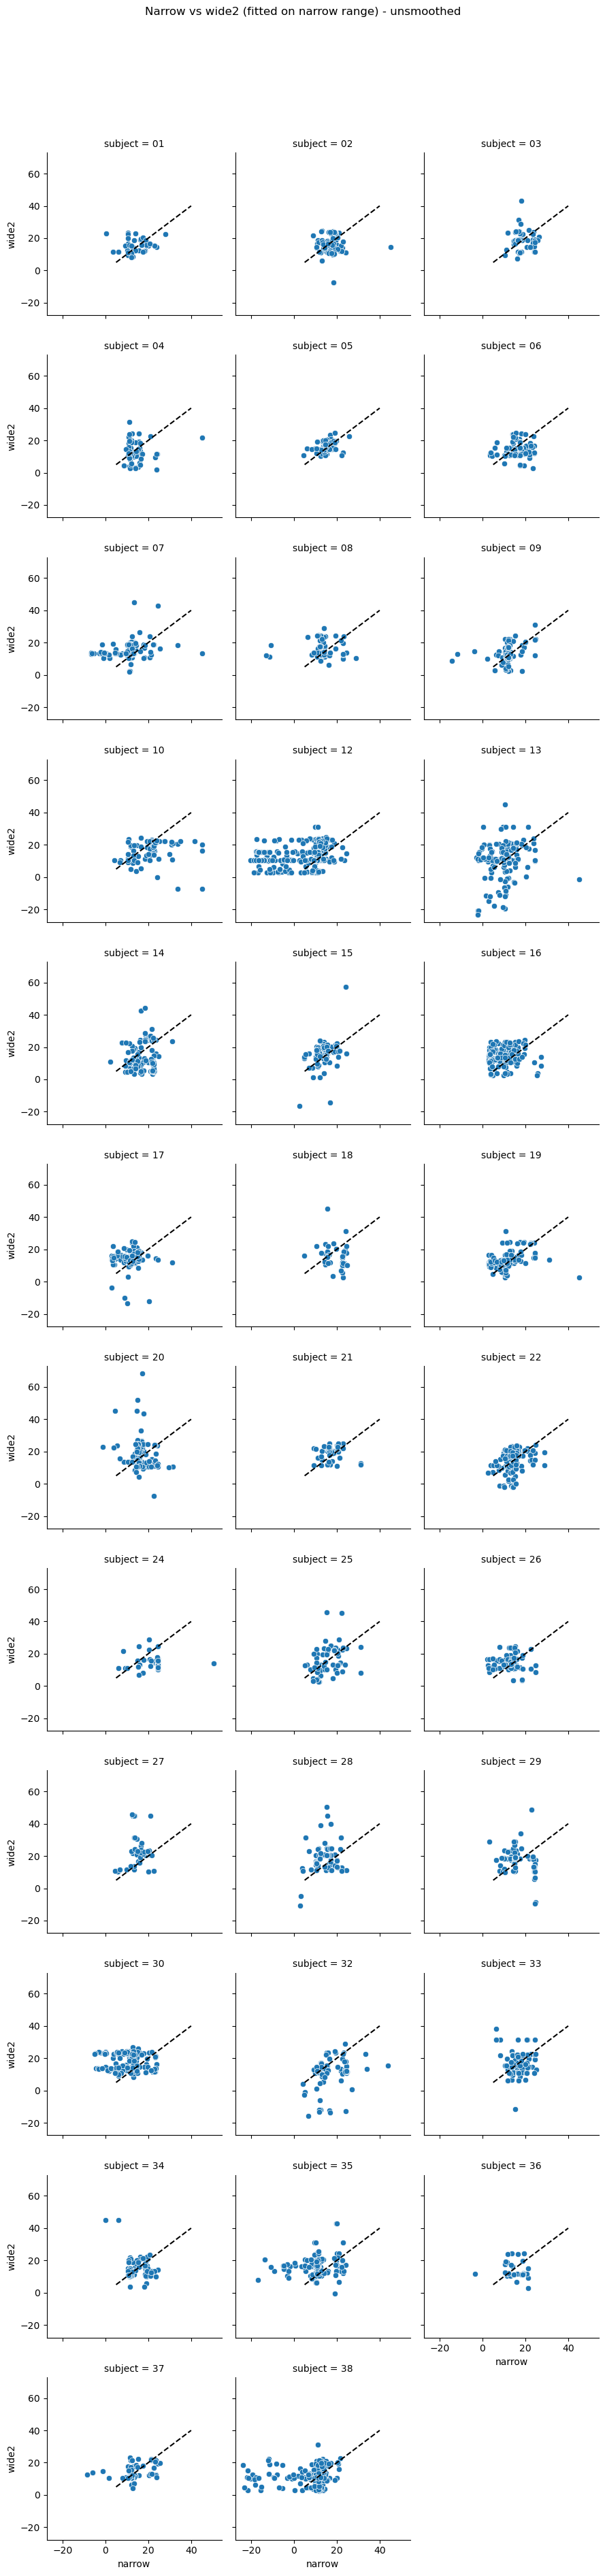

<Figure size 640x480 with 0 Axes>

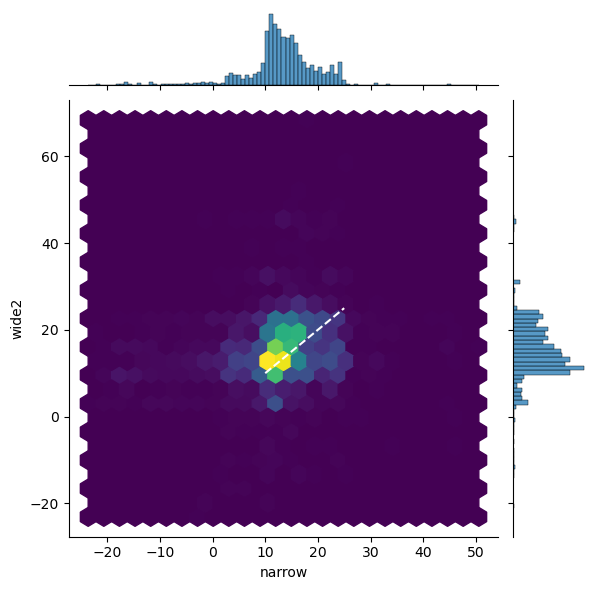

In [123]:
g = sns.FacetGrid(tmp.xs('unsmoothed', 0, 'smoothed').xs('gaussian', 0, 'model')['mode'].reset_index(), col='subject', col_wrap=3)

g.map(sns.scatterplot, 'narrow', 'wide2')
for ax in g.axes.flat:
    ax.plot([5, 40], [5, 40], color='black', linestyle='--')


g.fig.suptitle('Narrow vs wide2 (fitted on narrow range) - unsmoothed', y=1.05)
plt.figure()

sns.jointplot(data=tmp.xs('unsmoothed', 0, 'smoothed').xs('gaussian', 0, 'model')['mode'].reset_index(), x='narrow', y='wide2', kind='hex', cmap='viridis',
              gridsize=25)
plt.plot([10, 25], [10, 25], color='white', linestyle='--')

# Narrow vs wide (unfiltered)

In [ ]:
# Let's filter out anything where the cross-validated  is less 0 for both ranges combined
# tmp = df.stack(['subject'])
# Make sure subject is first index

# set order of index
tmp = df.copy().droplevel(-1).reorder_levels(['subject', 'session', 'smoothed']).sort_index()
tmp = tmp[(tmp[('cvr2', 'both')] > 0.00)]
# tmp = tmp[tmp[[('cvr2', 'wide'), ('cvr2', 'narrow')]].mean(1) > 0.00]
# tmp = tmp[(tmp[[('cvr2', 'wide2/'), ('cvr2', 'narrow')]] > 0.00).any(axis=1)]

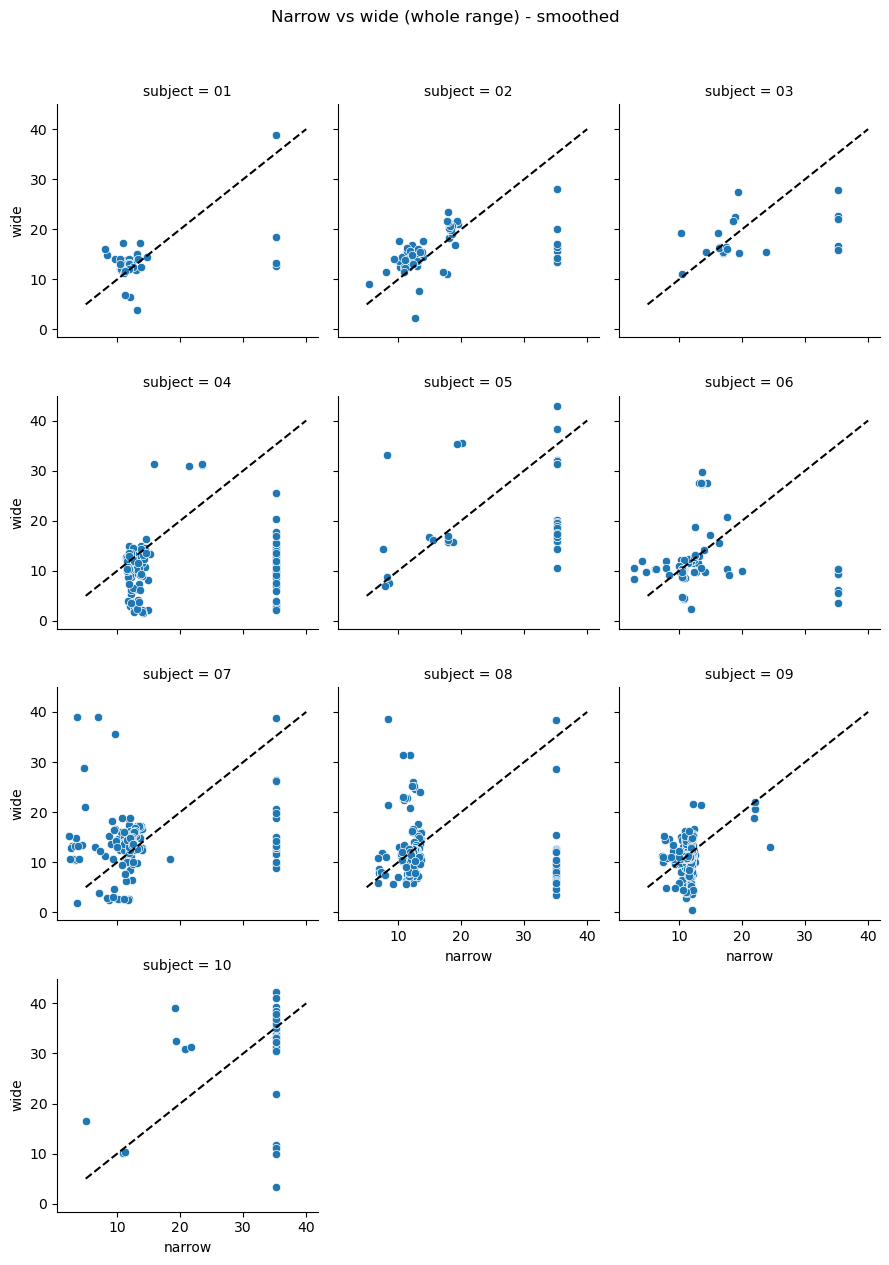

<Figure size 640x480 with 0 Axes>

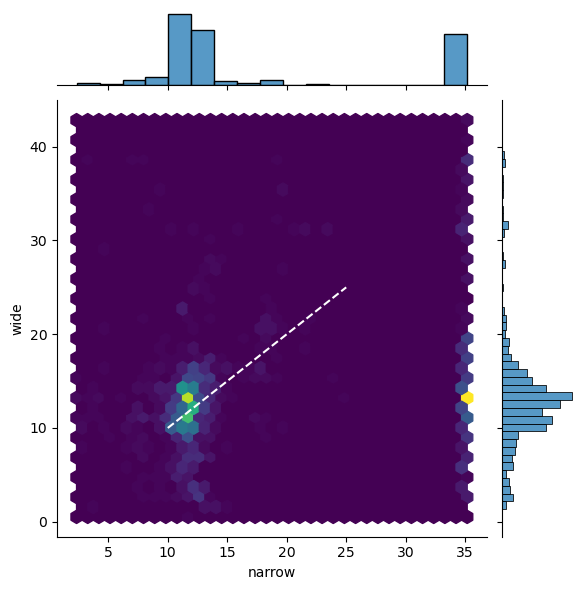

In [ ]:
g = sns.FacetGrid(tmp.xs('smoothed', 0, 'smoothed')['mode'].reset_index(), col='subject', col_wrap=3)

g.map(sns.scatterplot, 'narrow', 'wide')
for ax in g.axes.flat:
    ax.plot([5, 40], [5, 40], color='black', linestyle='--')


g.fig.suptitle('Narrow vs wide (whole range) - smoothed', y=1.05)
plt.figure()

sns.jointplot(data=tmp.xs('smoothed', 0, 'smoothed')['mode'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=35)
plt.plot([10, 25], [10, 25], color='white', linestyle='--')

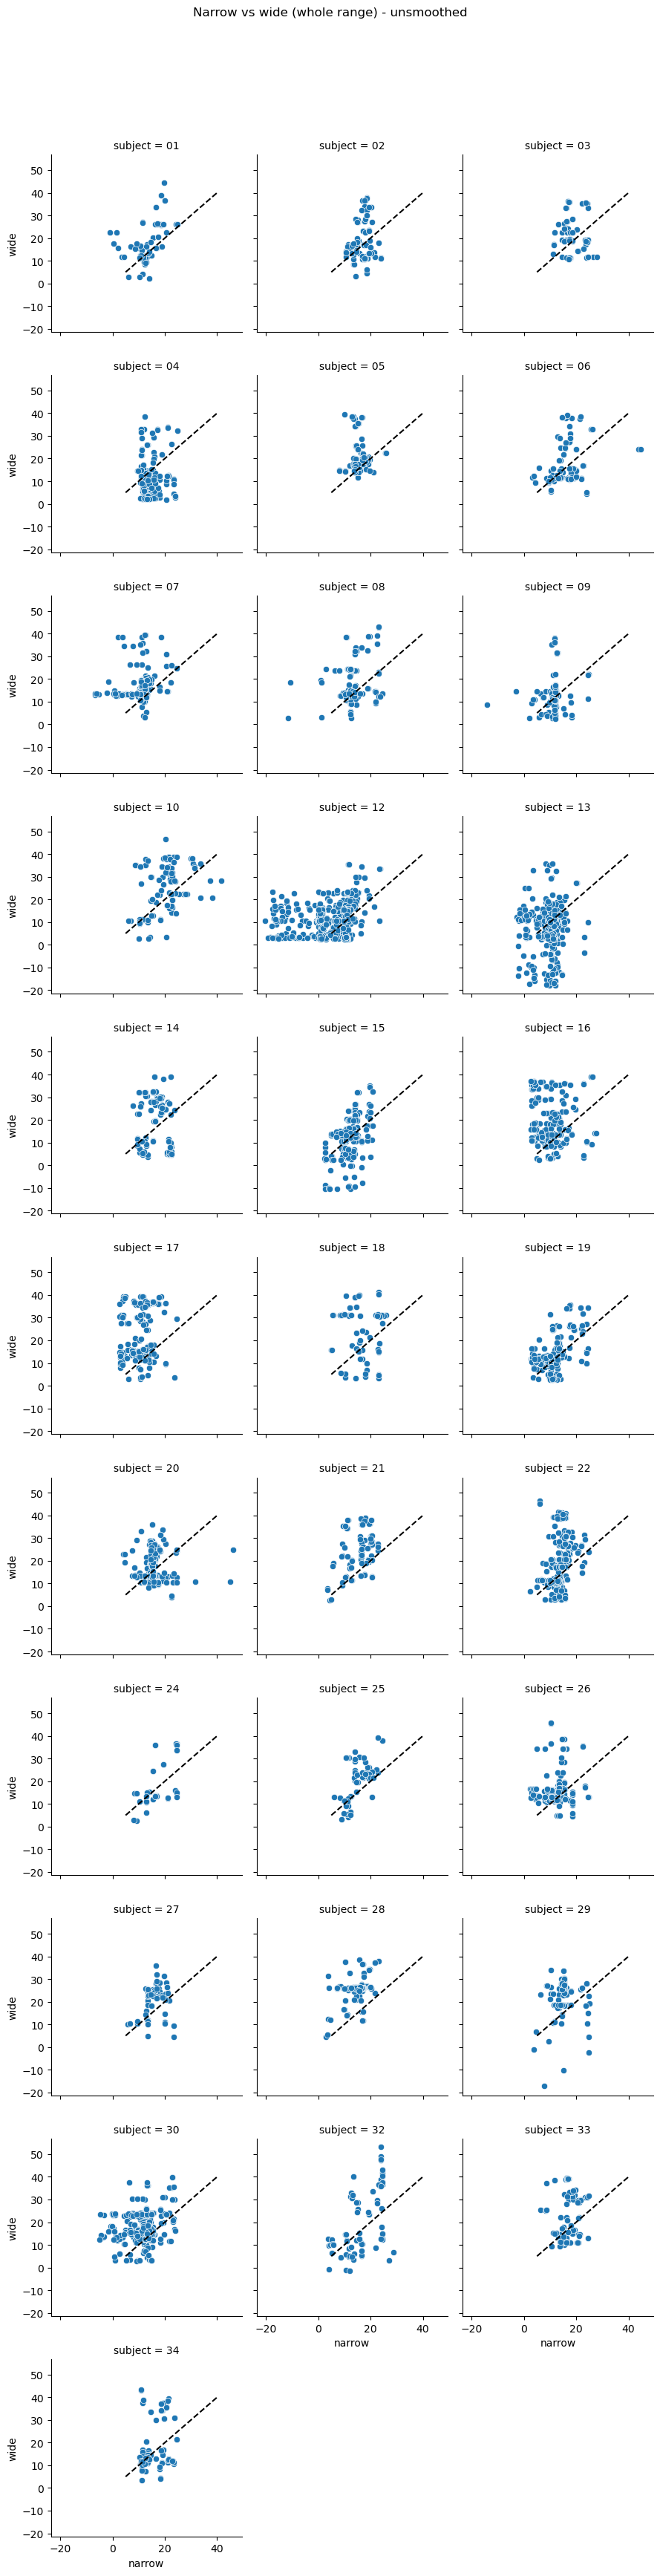

<Figure size 640x480 with 0 Axes>

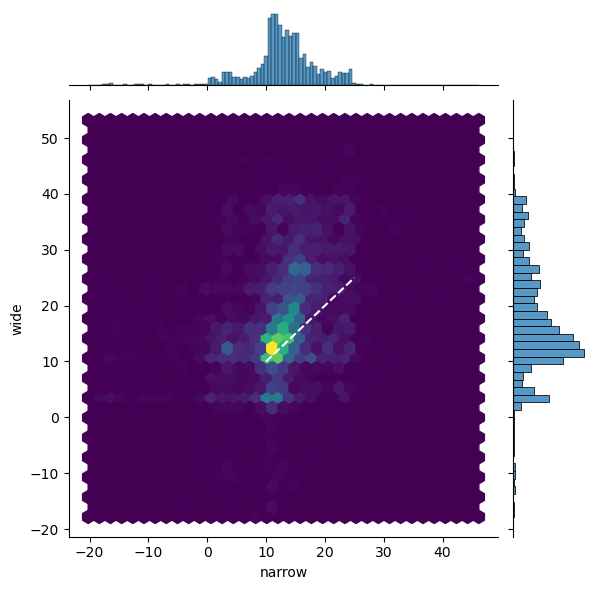

In [97]:
g = sns.FacetGrid(tmp.xs('unsmoothed', 0, 'smoothed')['mode'].reset_index(), col='subject', col_wrap=3)

g.map(sns.scatterplot, 'narrow', 'wide')
for ax in g.axes.flat:
    ax.plot([5, 40], [5, 40], color='black', linestyle='--')


g.fig.suptitle('Narrow vs wide (whole range) - unsmoothed', y=1.05)
plt.figure()

sns.jointplot(data=tmp.xs('unsmoothed', 0, 'smoothed')['mode'].reset_index(), x='narrow', y='wide', kind='hex', cmap='viridis',
              gridsize=35)
plt.plot([10, 25], [10, 25], color='white', linestyle='--')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/1278145697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp[('mode', 'narrow')])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/1278145697.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp[('mode', 'w

<Axes: xlabel="('mode', 'wide')", ylabel='Density'>

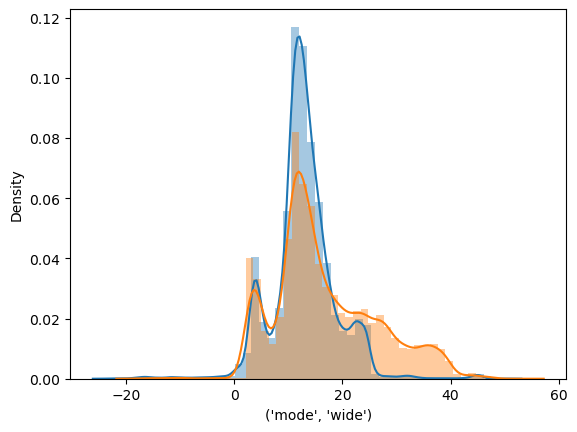

In [126]:
sns.distplot(tmp[('mode', 'narrow')])
sns.distplot(tmp[('mode', 'wide')])

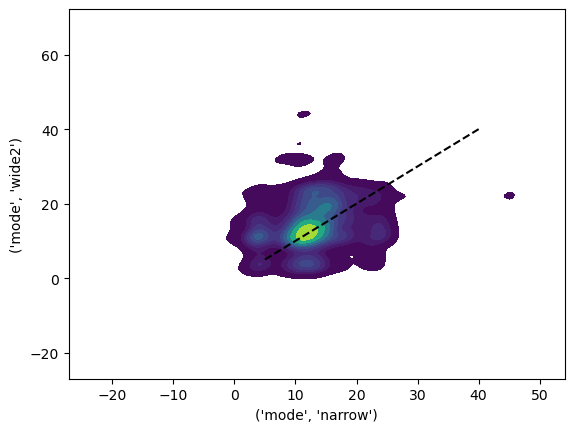

In [129]:
sns.kdeplot(data=tmp, x=('mode', 'narrow'), y=('mode', 'wide2'), fill=True, cmap='viridis')
plt.plot([5, 40], [5, 40], color='black', linestyle='--')

In [128]:
import seaborn as sns
import numpy as np

g = sns.FacetGrid(tmp.stack('range').reset_index(), hue='range', row='smoothed')
g.map(sns.histplot, 'mode', kde=True, bins=np.arange(10, 25,1))
g.add_legend()
g.set(xlim=(10, 25))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/multi.py", line 1542, in _get_level_number
    level = self.names.index(level)
ValueError: 'range' is not in list

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/4176499219.py", line 4, in <module>
    g = sns.FacetGrid(tmp.stack('range').reset_index(), hue='range', row='smoothed')
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/frame.py", line 9394, in stack
    result = stack(self, level, dropna=dropna, sort=sort)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/reshape/reshape.py", line 598, in stack
    level_num = fr

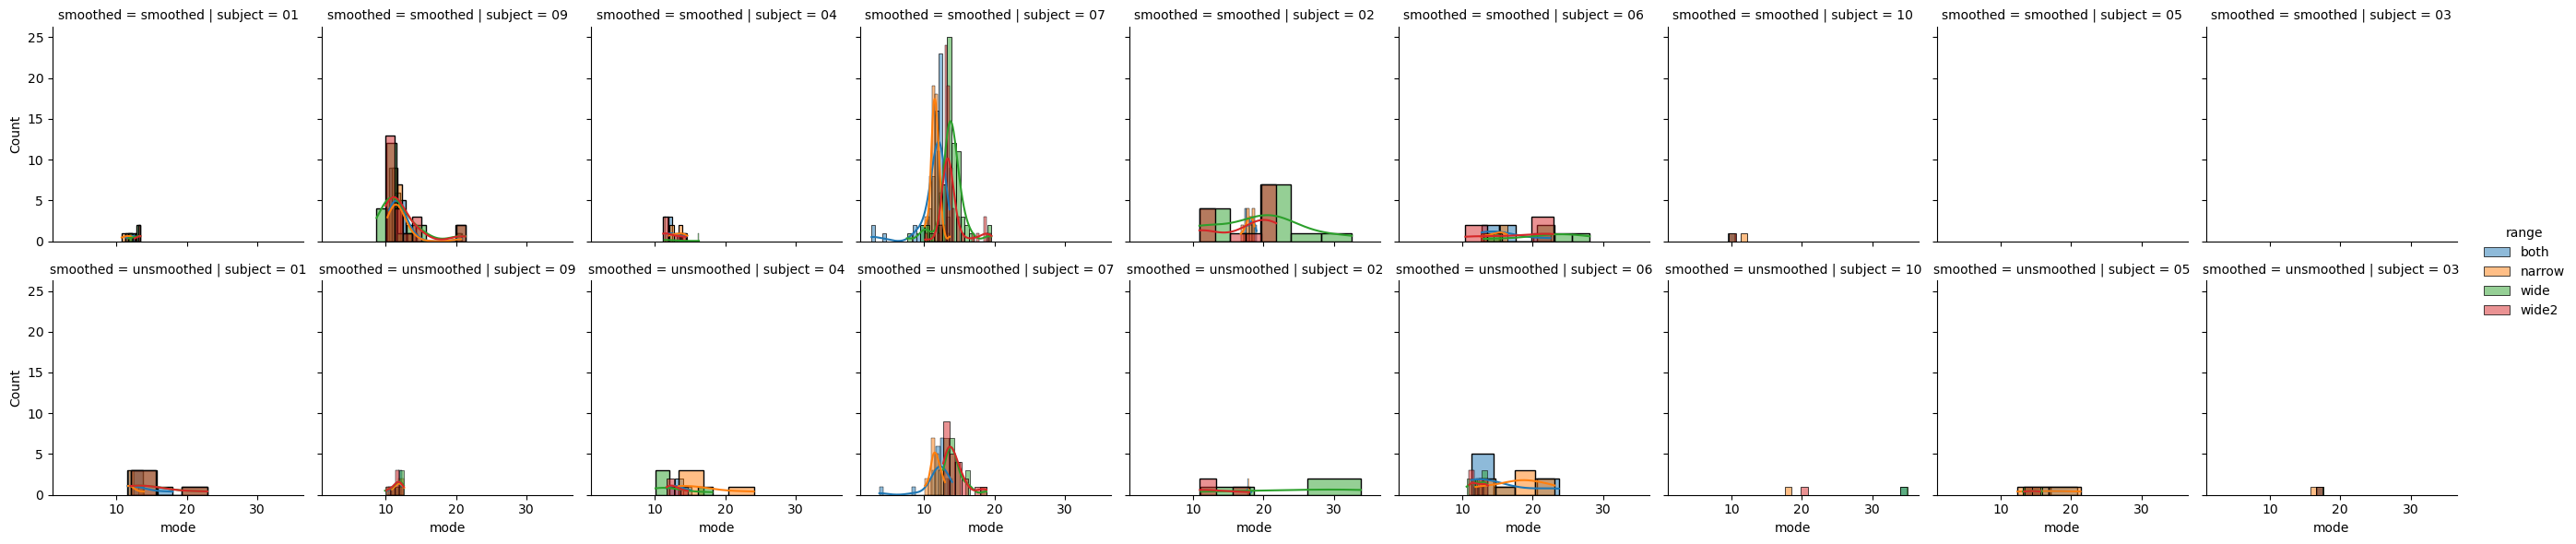

In [48]:
import seaborn as sns
g = sns.FacetGrid(tmp.stack('range').reset_index(), hue='range', col='subject', row='smoothed')
g.map(sns.histplot, 'mode', kde=True)
g.add_legend()

In [124]:
import seaborn as sns
g = sns.FacetGrid(tmp.stack('range').reset_index(), hue='range', row='smoothed')
g.map(sns.histplot, 'fwhm', kde=True)
g.add_legend()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/multi.py", line 1542, in _get_level_number
    level = self.names.index(level)
ValueError: 'range' is not in list

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/2931256688.py", line 2, in <module>
    g = sns.FacetGrid(tmp.stack('range').reset_index(), hue='range', row='smoothed')
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/frame.py", line 9394, in stack
    result = stack(self, level, dropna=dropna, sort=sort)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/reshape/reshape.py", line 598, in stack
    level_num = fr

In [90]:
sns.catplot(x='range', y='amplitude', data=tmp.stack('range').groupby(['subject', 'smoothed', 'range']).mean().reset_index(), kind='point', hue='smoothed', dodge=True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/multi.py", line 1542, in _get_level_number
    level = self.names.index(level)
ValueError: 'range' is not in list

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_51312/2351929872.py", line 1, in <module>
    sns.catplot(x='range', y='amplitude', data=tmp.stack('range').groupby(['subject', 'smoothed', 'range']).mean().reset_index(), kind='point', hue='smoothed', dodge=True)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/frame.py", line 9394, in stack
    result = stack(self, level, dropna=dropna, sort=sort)
  File "/Users/gdehol/mambaforge/lib/python3.

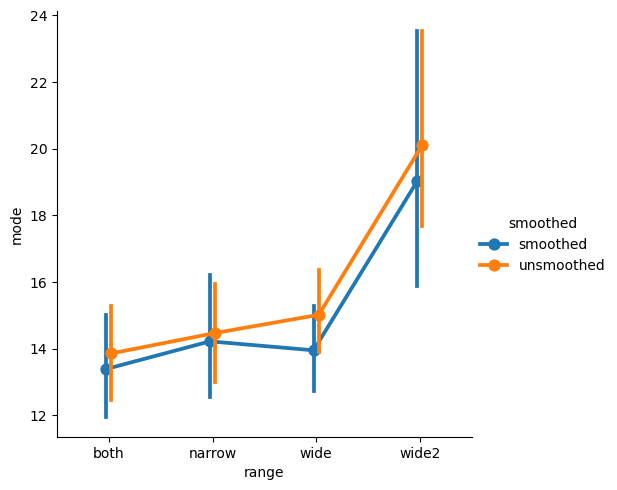

In [89]:
sns.catplot(x='range', y='mode', data=tmp.stack('range').groupby(['subject', 'smoothed', 'range']).mean().reset_index(), kind='point', hue='smoothed', dodge=True)

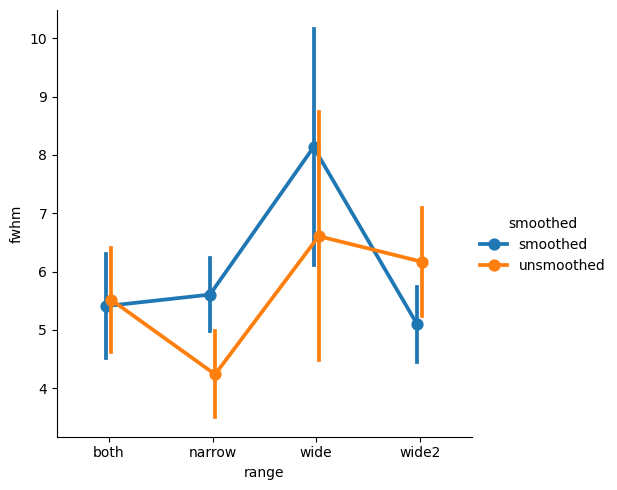

In [51]:
sns.catplot(x='range', y='fwhm', data=tmp.stack('range').groupby(['subject', 'smoothed', 'range']).mean().reset_index(), kind='point', hue='smoothed', dodge=True, errorbar='se')

(0.0, 40.0)

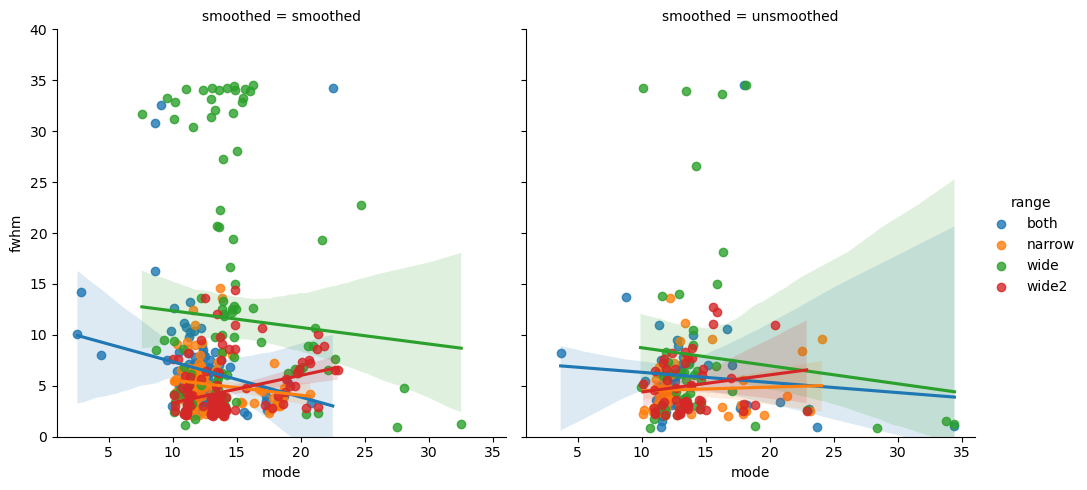

In [52]:
import matplotlib.pyplot as plt
sns.lmplot(x='mode', y='fwhm', data=tmp.stack('range').reset_index(), col='smoothed', hue='range')

plt.ylim(0, 40)

In [132]:
(tmp['mode'] < 25).all(1)

subject  session  smoothed    model    
01       both     smoothed    gaussian     False
                              gaussian      True
                              gaussian      True
                              gaussian      True
                              gaussian      True
                                           ...  
38       both     unsmoothed  lognormal     True
                              lognormal     True
                              lognormal    False
                              lognormal     True
                              lognormal     True
Length: 18204, dtype: bool

In [133]:
tmp = df.stack(['subject'])
tmp = tmp.loc[(tmp['mode'] < 25).all(1)]

sns.catplot(x='range', y='mode', data=tmp.stack('range').groupby(['subject', 'smoothed', 'range']).mean().reset_index(), kind='point', hue='smoothed', dodge=True,
            errorbar='se')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/2904967888.py", line 1, in <module>
    tmp = df.stack(['subject'])
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/frame.py", line 9392, in stack
    result = stack_multiple(self, level, dropna=dropna, sort=sort)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/reshape/reshape.py", line 681, in stack_multiple
    raise ValueError(
ValueError: level should contain all level names or all level numbers, not a mixture of the two.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    st

In [134]:
tmp = df.stack(['subject'])
tmp = tmp.loc[(tmp['mode'] < 25).all(1)]

sns.catplot(x='range', y='fwhm', data=tmp.stack('range').groupby(['subject', 'smoothed', 'range']).mean().reset_index(), kind='point', hue='smoothed', dodge=True,
            errorbar='se')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/3951660783.py", line 1, in <module>
    tmp = df.stack(['subject'])
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/frame.py", line 9392, in stack
    result = stack_multiple(self, level, dropna=dropna, sort=sort)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/reshape/reshape.py", line 681, in stack_multiple
    raise ValueError(
ValueError: level should contain all level names or all level numbers, not a mixture of the two.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    st

In [135]:
df['cvr2'].stack('subject').groupby(['subject']).apply(lambda d: d.corr())

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_11750/160093486.py", line 1, in <module>
    df['cvr2'].stack('subject').groupby(['subject']).apply(lambda d: d.corr())
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/frame.py", line 9394, in stack
    result = stack(self, level, dropna=dropna, sort=sort)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/reshape/reshape.py", line 598, in stack
    level_num = frame.columns._get_level_number(level)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 1992, in _get_level_number
    self._validate_index_level(level)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 1987, in _val

In [97]:
df['mode'].stack('subject').groupby(['subject', 'smoothed']).apply(lambda d: d.corr())

range                          wide    narrow      both
subject smoothed   range                               
01      smoothed   wide    1.000000  0.255567  0.576580
                   narrow  0.255567  1.000000  0.344114
                   both    0.576580  0.344114  1.000000
        unsmoothed wide    1.000000  0.134460  0.517123
                   narrow  0.134460  1.000000  0.265426
                   both    0.517123  0.265426  1.000000
02      smoothed   wide    1.000000  0.123189  0.529042
                   narrow  0.123189  1.000000  0.305775
                   both    0.529042  0.305775  1.000000
        unsmoothed wide    1.000000  0.039004  0.496808
                   narrow  0.039004  1.000000  0.172157
                   both    0.496808  0.172157  1.000000
03      smoothed   wide    1.000000  0.150447  0.575289
                   narrow  0.150447  1.000000  0.301796
                   both    0.575289  0.301796  1.000000
        unsmoothed wide    1.000000  0.231435  0.564900
                   narrow  0.231435  1.000000  0.429132
                   both    0.564900  0.429132  1.000000
04      smoothed   wide    1.000000  0.117579  0.586492
                   narrow  0.117579  1.000000  0.213618
                   both    0.586492  0.213618  1.000000
        unsmoothed wide    1.000000  0.120565  0.653789
                   narrow  0.120565  1.000000  0.242744
                   both    0.653789  0.242744  1.000000
05      smoothed   wide    1.000000  0.041145  0.482508
                   narrow  0.041145  1.000000  0.194150
                   both    0.482508  0.194150  1.000000
        unsmoothed wide    1.000000  0.009011  0.580497
                   narrow  0.009011  1.000000  0.109335
                   both    0.580497  0.109335  1.000000
06      smoothed   wide    1.000000  0.060599  0.582315
                   narrow  0.060599  1.000000  0.320384
                   both    0.582315  0.320384  1.000000
        unsmoothed wide    1.000000  0.073477  0.553875
                   narrow  0.073477  1.000000  0.218845
                   both    0.553875  0.218845  1.000000
07      smoothed   wide    1.000000  0.200234  0.448641
                   narrow  0.200234  1.000000  0.250176
                   both    0.448641  0.250176  1.000000
        unsmoothed wide    1.000000  0.118196  0.566392
                   narrow  0.118196  1.000000  0.273493
                   both    0.566392  0.273493  1.000000